In [ ]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'This is a foo bar sentence .'
text2 = 'This sentence is similar to a foo bar sentence .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print('Cosine:', cosine)

In [ ]:
pip install tweepy

In [ ]:
import os
import pandas as pd
import tweepy as tw


In [ ]:
pip install python-twitter --user

In [ ]:
import twitter

In [ ]:
api = twitter.Api(consumer_key='5QUCmsZc97JKVhSW7UqB4PmGO',
                      consumer_secret='Szv1qILgFywnl1IbLakJDIqbt44unJOXWEWY7iZ2ksw6WZvDjx',
                      access_token_key='1159073576495923200-s1eAfxDF86zf9J7brJoe2CEFwU0UW0',
                      access_token_secret='sxA356gk2uPJFU5iIyoB2yKLUrAbnvZpSGV9cRtqzEWb7')

In [ ]:
users = api.GetFriends()
print([u.name for u in users])
timel=api.GetHomeTimeline()
tie2=api.GetUserTimeline(screen_name="MMitanshu")
for ti in tie2:
    print(ti)
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")
for res in results:
    print(res)
results = api.GetSearch(raw_query="q=shiny pants&result_type=recent&since=2014-07-19",result_type='mixed')
for res in results:
    print(res)
#tweet_mode used to get full text inplace of truncated
results = api.GetSearch(
    raw_query="q=holi%20&tweet_mode=extended",include_entities=True,result_type='recent')
for res in results:
    print(res)

In [ ]:
pip install beautifulsoup4

In [ ]:
from requests import get
url = 'https://twitter.com/search?q=shiny%20pants&src=typed_query'
response = get(url)
print(response.text)
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
movie_containers = html_soup.find_all('div')
print(type(movie_containers))
print(len(movie_containers))
for m in movie_containers:
    print(m)

In [ ]:
pip install -U selenium --user

In [1]:
#data scrapping code
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#from selenium.common.exceptions import TimeOutException, NoSuchElementException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import json
import logging

# path where the selenium driver is copied.
#for lab pc ashish
#driver_path = '/home/ashishranjan/chromedriver'
#for home pc ashish
# driver_path = '/home/ashish/Downloads/chromedriver'
#for lab pc anurag
# driver_path = '/home/anurag.barfa/mywork/btp/chromedriver'
#for home pc anurag
driver_path = '/home/anurag/Work/btp/BTP/chromedriver'
# This will open a new chrome session.

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-notifications")
# https://stackoverflow.com/questions/53902507/unknown-error-session-deleted-because-of-page-crash-from-unknown-error-cannot
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(executable_path = driver_path,options=chrome_options)
#driver.get("https://twitter.com/search?q=delhi%20election&src=typed_query")
query="AvengersEndgame"
driver.get("https://twitter.com/search?q="+query+"&src=typed_query")
# driver.get("https://twitter.com/gautamkaulgud")
SCROLL_PAUSE_TIME = 9

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
scroll_count=2 #number of times you want to scroll the page
tweet_boxes=[]
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
    tutorial_code_soup = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
    tweet = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
    tweet_boxes=tweet_boxes+tweet
    scroll_count=scroll_count-1
    print(scroll_count)
    if scroll_count==0:
        break
            
#tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
# tutorial_code_soup1 = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
# for tweet in tutorial_code_soup1:
#     print(tweet)
# # tutorial_code_soup2 = tutorial_soup.find_all('ol',attrs={'id':'stream-items-id'})
# tutorial_code_soup2 = tutorial_soup.find_all('li',attrs={'class':'js-stream-item stream-item stream-item'})
# for tweet in tutorial_code_soup2:
#     print(tweet)
tweetstemp=[]
 
for i in tweet_boxes:
    # Add to the new list
    # only if not present
    if i not in tweetstemp:
        tweetstemp.append(i)
tweet_boxes = tweetstemp
len(tweet_boxes)

1
0


33

In [2]:
def gettweet(box,query):
    tweet=box.findChildren('div',recursive=False)[1].text
    user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
    date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
    likes = comments = retweet = 'None'
    span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
    likes = span[3].text
    retweet = span[2].text
    comments = span[1].text
    tags=[]
    mentions=[]
    urls=0
    for anchor in box.find_all('a'):
        #print(anchor.text+"######")
        if 'href' in anchor.attrs:
            if anchor.attrs['href'].split('/')[1]=='hashtag':
                tags.append(anchor.text)
            if anchor.attrs['href'].split(':')[0]=='https':
                urls=urls+1
        if len(anchor.text)>0 and anchor.text[0]=='@':
#             mentions.append(anchor.text)
            if not ('aria-haspopup' in anchor.attrs and anchor.attrs['aria-haspopup']=="false"):
                mentions.append(anchor.text)
        
    #print(tags)
    #print(mentions)
    cosine_similarity=cosine(tweet,query)*100
    multimedia_flag=0
    s = str(box.find('img'))
    if ((box.find('img') and s.find('format')!=-1 )  or box.find('video')):
        multimedia_flag=1  
    return tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity

In [3]:
import csv
with open('data/sample_'+query+'.csv', mode='w') as sample:
    count=0
    sample_writer = csv.writer(sample, delimiter=',')
    sample_writer.writerow(['Query','Date','user','Tweet','Img_present','Likes','commnets','retweet','tags','mentions','url_count','length','cosine_similarity(%)'])
    for boxes in tweet_boxes:
        try:
            print("in")
            tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity = gettweet(boxes,query)
            sample_writer.writerow([query,date, user, tweet, multimedia_flag,likes,comments,retweet,",".join(tags),",".join(mentions),urls,len(tweet),cosine_similarity])
        except:
            pass

in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in


In [ ]:
# gettweet(tweet_boxes[1426],query)
try:
#     box=tweet_boxes[1426]
    gettweet(tweet_boxes[1426],query)
except:
    print(e)
# print(box.text)
# tweet=box.findChildren('div',recursive=False)[1].text
# user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
# date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
# likes = comments = retweet = 'None'
# span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
# likes = span[3].text
# retweet = span[2].text
# comments = span[1].text

In [4]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def cosine(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
#     print(intersection)
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def jaccard(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
    union =set(vec1.keys()) | set(vec2.keys())
    return len(intersection)/len(union)

In [3]:
#text cleaning code
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
    

In [ ]:
pip install chainer==1.17.0 --user

In [ ]:
pip install tqdm --user

In [ ]:
pip install scipy

In [ ]:
pip install scikit-learn --user

In [ ]:
pip install h5py --user

In [69]:
# encoding: utf-8 
query='INDvAUS'
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timezone
data=[] 
training_X=[]
training_Y=[]
with open('data/'+query+'.csv', mode='r',encoding='utf-8') as sample:
    sample_reader = csv.reader(sample, delimiter=',')
    title=['rank']
    for rank,row in enumerate(sample_reader):
        if rank==0:
            title=title+row
            data=[[] for x in title]
        else:
            data[0].append(rank)
            training_Y.append(rank)
            for i in range(0,len(row)):
                data[i+1].append(row[i])
            how_old=(datetime.now()-datetime.strptime(row[8], '%I:%M %p · %d %b %Y')).total_seconds()
            cos=cosine(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            jac=jaccard(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            training_X.append([int(row[3]), int(row[4]), int(row[5]), int(row[6]), int(how_old), int(row[9]), int(row[10]), int(row[11]), int(row[12]), int(row[15]), int(row[16]), int(cos), int(jac)])
print(title) 
print(type(training_X))

['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']
<class 'list'>


In [56]:
import numpy as np
from sklearn import preprocessing

In [70]:
X = preprocessing.normalize(np.array(training_X))

# y = np.array(training_Y)

y = preprocessing.normalize(np.array(training_Y).reshape(1, -1))[0]

In [ ]:
# from sklearn import preprocessing
# n=100000
# X =  np.random.rand(n,12)
# y =  np.random.rand(n)

In [36]:
# -*- coding: utf-8 -*-
import sys,os

import numpy as np
import six
import pickle
import scipy
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import optimizers
from chainer import serializers
from tqdm import tqdm
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
from learning2rank.utils import plot_result
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt

######################################################################################
# 誤差のプロット関数。自動的に保存するので上書きされたくない時は名前を変える

def acc(train_acc, test_acc, savename='result_acc.pdf'):
    ep = np.arange(len(train_acc)) + 1

    plt.plot(ep, train_acc, color="blue", linewidth=1, linestyle="-", label="Train")
    plt.plot(ep, test_acc, color="red",  linewidth=1, linestyle="-", label="Test")
    plt.title("Accuracy")
    plt.xlabel("iteration")
    plt.ylabel("accuracy")
    plt.legend(loc='lower right')
    plt.savefig(savename)
    

    
def loss(train_loss, test_loss, savename='result_loss.pdf'):
    ep = np.arange(len(train_loss)) + 1

    plt.plot(ep, train_loss, color="blue", linewidth=1, linestyle="-", label="Train")
    plt.plot(ep, test_loss, color="red",  linewidth=1, linestyle="-", label="Test")
    plt.title("Loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")

    plt.legend(loc='upper right')
    plt.savefig(savename)
    
    
    


class NN(object):

    def loadModel(self, modelName):
        print('Load model')
        serializers.load_hdf5(modelName, self.model)
        print('Load optimizer state')
        serializers.load_hdf5(modelName[:-5] + 'state', self.optimizer)


    def initializeModel(self, Model, train_X, n_units1, n_units2, optimizerAlgorithm):
        print("prepare initialized model!")
        print(train_X[0])
        self.model = Model(len(train_X[0]), n_units1, n_units2, 1)
        self.initializeOptimizer(optimizerAlgorithm)

    def initializeOptimizer(self, optimizerAlgorithm):
        if optimizerAlgorithm == "Adam":
            self.optimizer = optimizers.Adam(alpha=0.0001)
        elif optimizerAlgorithm == "AdaGrad":
            self.optimizer = optimizers.AdaGrad()
        elif optimizerAlgorithm == "SGD":
            self.optimizer = optimizers.MomentumSGD()
        else:
            raise ValueError('could not find %s in optimizers {"Adam", "AdaGrad", "SGD"}' % (optimizerAlgorithm))
        self.optimizer.setup(self.model)

    def saveModels(self, savemodelName):
        print('save the model')
        serializers.save_hdf5(savemodelName, self.model) 
        print('save the optimizer')
        serializers.save_hdf5(savemodelName[:-5]+ 'state', self.optimizer)  

    def splitData(self, fit_X, fit_y, tv_ratio):
        print('load dataset')
        perm = np.random.permutation(len(fit_X))
        N_train = int(np.floor(len(fit_X) * tv_ratio))
        train_X, validate_X = np.split(fit_X[perm].astype(np.float32),   [N_train])
        train_y, validate_y = np.split(fit_y[perm].astype(np.float32).reshape(len(fit_y), 1), [N_train])
        return train_X, train_y, validate_X, validate_y
    
    def splitData2(self, fit_X, fit_y, tv_ratio):
        print('load dataset')
        train_X=[]
        train_y=[]
        validate_X=[] 
        validate_y=[]
        for i in range(0,len(fit_X)):
            temp_fit_X=fit_X[i]
            tmep_fits_y=fit_y[i]
            perm = np.random.permutation(len(temp_fit_X))
            N_train = int(np.floor(len(temp_fit_X) * tv_ratio))
            temp_train_X, temp_validate_X = np.split(temp_fit_X[perm].astype(np.float32),   [N_train])
            temp_train_y, temp_validate_y = np.split(temp_fit_y[perm].astype(np.float32).reshape(len(temp_fit_y), 1), [N_train])
            train_X.append(temp_train_X)
            train_y.append(temp_train_y)
            validate_X.append(temp_validate_X)
            validate_y.append(temp_validate_y)
        return train_X, train_y, validate_X, validate_y
    def predictTargets(self, x_pred, batchsize):
        N_pred = len(x_pred)
        y_pred = np.zeros(0)
        for j in tqdm(six.moves.range(0, N_pred, batchsize)):
            x = chainer.Variable(np.asarray(x_pred[j:j + batchsize]), volatile='on')
            y_pred = np.append(y_pred, self.model.predict(x))
        return y_pred

    def predict(self, predict_X):
        return self.model.predict(predict_X.astype(np.float32))

    # def predict(self, predict_X, batchsize=100):
    #     return self.predictTargets(predict_X.astype(np.float32), batchsize)



######################################################################################
# Define model
class Model(chainer.Chain):
    """
    ListNet - Listwise comparison of ranking.
    The original paper:
        http://research.microsoft.com/en-us/people/tyliu/listnet.pdf

    NOTICE:
        The top-k probability is not written.
        This is listwise approach with neuralnets, 
        comparing two arrays by Jensen-Shannon divergence.

    """
    def __init__(self, n_in, n_units1, n_units2, n_out):
        #in our code we have used no of features as n_in and n_out is 1
        super(Model, self).__init__(
            l1=L.Linear(n_in, n_units1),
            l2=L.Linear(n_units1, n_units2),
            l3=L.Linear(n_units2, n_out),
        )


    def __call__(self, x, t):
        h1 = self.l1(x)
        y = self.l3(F.relu(self.l2(F.relu(self.l1(x)))))
        # self.loss = self.listwise_cost(y_data, t_data)
        self.loss = self.jsd(t, y)
        return self.loss


    def predict(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h = F.relu(self.l3(h2))
        return h.data

    def kld(self, vec_true, vec_compare):
        ind = vec_true.data * vec_compare.data > 0
        ind_var = chainer.Variable(ind)
        include_nan = vec_true * F.log(vec_true / vec_compare)
        z = chainer.Variable(np.zeros((len(ind), 1), dtype=np.float32))
        # return np.nansum(vec_true * np.log(vec_true / vec_compare))
        return F.sum(F.where(ind_var, include_nan, z))

    def jsd(self, vec_true, vec_compare):
        vec_mean = 0.5 * (vec_true + vec_compare)
        return 0.5 * self.kld(vec_true, vec_mean) + 0.5 * self.kld(vec_compare, vec_mean)

    def topkprob(self, vec, k=5):
        vec_sort = np.sort(vec)[-1::-1]
        topk = vec_sort[:k]
        ary = np.arange(k)
        return np.prod([np.exp(topk[i]) / np.sum(np.exp(topk[i:])) for i in ary])

    def listwise_cost(self, list_ans, list_pred):
        return - np.sum(self.topkprob(list_ans) * np.log(self.topkprob(list_pred)))


class ListNet(NN):
    """
    ListNet training function.
    Usage (Initialize):
        RankModel = ListNet()

    Usage (Traininng):
        Model.fit(X, y)

    With options:
        Model.fit(X, y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):

    """
    def __init__(self, resumemodelName=None):
        self.resumemodelName = resumemodelName
        self.train_loss, self.test_loss = [], []
        self.train_acc, self.test_acc = [], []
        if resumemodelName is not None:
            print("load resume model!")
            self.loadModel(resumemodelName)

    # リストネットの誤差関数
    def ndcg(self, y_true, y_score, k=5):
        y_true = y_true.ravel()
        y_score = y_score.ravel()
        y_true_sorted = sorted(y_true, reverse=True)
        ideal_dcg = 0
        for i in range(k):
            ideal_dcg += (2 ** y_true_sorted[i] - 1.) / np.log2(i + 2)
        dcg = 0
        argsort_indices = np.argsort(y_score)[::-1]
        for i in range(k):
            dcg += (2 ** y_true[argsort_indices[i]] - 1.) / np.log2(i + 2)
        ndcg = dcg / ideal_dcg
        return ndcg

    # リストネットのトレーニング専用関数
    def trainModel(self, x_train, y_train, x_test, y_test, n_epoch, batchsize):
        print("Start training and validation loop......")
        N = len(x_train)
        N_test = len(x_test)
        for epoch in six.moves.range(1, n_epoch + 1):
            print('epoch', epoch)           
            # training
            perm = np.random.permutation(N)
            sum_loss = 0
            print("bef lop")
            for i in tqdm(six.moves.range(0, N, batchsize)):
                x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
                t = chainer.Variable(np.asarray(y_train[perm[i:i + batchsize]]))
                self.optimizer.update(self.model, x, t)
                sum_loss += float(self.model.loss.data) * len(t.data)

            print('train mean loss={}'.format(sum_loss / N))
            self.train_loss.append(sum_loss / N)

            perm = np.random.permutation(N_test)
            sum_loss = 0
            for j in tqdm(six.moves.range(0, N_test, batchsize)):
                x = chainer.Variable(np.asarray(x_test[perm[j:j + batchsize]]), volatile='off')
                t = chainer.Variable(np.asarray(y_test[perm[j:j + batchsize]]), volatile='off')
                loss = self.model(x, t)
                sum_loss += float(loss.data) * len(t.data)
            print('test  mean loss={}'.format(sum_loss / N_test))
            self.test_loss.append(sum_loss / N_test)

            train_score = self.model.predict(chainer.Variable(x_train))
            test_score = self.model.predict(chainer.Variable(x_test))
            train_ndcg = self.ndcg(y_train, train_score)
            test_ndcg = self.ndcg(y_test, test_score)
            self.train_acc.append(train_ndcg)
            self.test_acc.append(test_ndcg)
            print("epoch: {0}".format(epoch + 1))
            print("NDCG@100 | train: {0}, test: {1}".format(train_ndcg, test_ndcg))

    def trainModel2(self, X_train, Y_train, X_test, Y_test, n_epoch, batchsize):
        print("Start training and validation loop......")
        for epoch in six.moves.range(1, n_epoch + 1):
            print('epoch', epoch)           
            # training
            for query_no in range(0,len(X_train)):
                x_train=X_train[query_no]
                y_train=Y_train[query_no]
                x_test=X_test[query_no]
                y_test=Y_test[query_no]
                N = len(x_train)
                N_test = len(x_test)
                perm = np.random.permutation(N)
                sum_loss = 0
                for i in tqdm(six.moves.range(0, N, batchsize)):
                    x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
                    t = chainer.Variable(np.asarray(y_train[perm[i:i + batchsize]]))
                    self.optimizer.update(self.model, x, t)
                    sum_loss += float(self.model.loss.data) * len(t.data)

                print('train mean loss={}'.format(sum_loss / N))
                self.train_loss.append(sum_loss / N)

                perm = np.random.permutation(N_test)
                sum_loss = 0
                for j in tqdm(six.moves.range(0, N_test, batchsize)):
                    x = chainer.Variable(np.asarray(x_test[perm[j:j + batchsize]]), volatile='off')
                    t = chainer.Variable(np.asarray(y_test[perm[j:j + batchsize]]), volatile='off')
                    loss = self.model(x, t)
                    sum_loss += float(loss.data) * len(t.data)
                print('test  mean loss={}'.format(sum_loss / N_test))
                self.test_loss.append(sum_loss / N_test)

                train_score = self.model.predict(chainer.Variable(x_train))
                test_score = self.model.predict(chainer.Variable(x_test))
                train_ndcg = self.ndcg(y_train, train_score)
                test_ndcg = self.ndcg(y_test, test_score)
                self.train_acc.append(train_ndcg)
                self.test_acc.append(test_ndcg)
                print("epoch: {0}".format(epoch + 1))
                print("NDCG@100 | train: {0}, test: {1}".format(train_ndcg, test_ndcg))
            
    def fit(self, fit_X, fit_y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):
        train_X, train_y, validate_X, validate_y = self.splitData(fit_X, fit_y, tv_ratio)
        print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示

        if self.resumemodelName is None:
            self.initializeModel(Model, train_X, n_units1, n_units2, optimizerAlgorithm)
        
        self.trainModel(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)

        plot_result.acc(self.train_acc, self.test_acc)
        plot_result.loss(self.train_loss, self.test_loss)
        self.saveModels(savemodelName)
    
    def fit2(self, fit_X, fit_y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):
        train_X, train_y, validate_X, validate_y = self.splitData2(fit_X, fit_y, tv_ratio)
#         print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示
        if self.resumemodelName is None:
            self.initializeModel(Model, train_X[0], n_units1, n_units2, optimizerAlgorithm)
        
        self.trainModel2(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)
    
    def test(self, fit_X, fit_y, batchsize=100, n_epoch=1, tv_ratio=0.95, optimizerAlgorithm="Adam"):
        """
        usage:
        Model = ListNet(MODELNAME)
        Model.test(fit_X, fit_y)
        """
        
        train_X, train_y, validate_X, validate_y = self.splitData(fit_X, fit_y, tv_ratio)
        print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示        
        self.trainModel(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)


################################################################################################
## end of file ##
################################################################################################




  2%|▏         | 1/41 [00:00<00:04,  8.80it/s]

load dataset
The number of data, train: 4038 validate: 213
prepare initialized model!
[0.0000000e+00 9.8330772e-04 3.4881210e-05 2.5679417e-06 9.9999952e-01
 0.0000000e+00 5.9276656e-05 1.9259562e-06 2.1399514e-06 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
Start training and validation loop......
epoch 1
bef lop


/home/anurag/mlenv/lib/python3.6/site-packages/chainer/functions/math/exponential.py:47: RuntimeWarning: invalid value encountered in log
  return utils.force_array(numpy.log(x[0])),
/home/anurag/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:165: RuntimeWarning: invalid value encountered in greater
/home/anurag/mlenv/lib/python3.6/site-packages/chainer/functions/activation/relu.py:43: RuntimeWarning: invalid value encountered in greater
  return utils.force_array(gy[0] * (x[0] > 0)),
  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0290403689648504
test  mean loss=0.0
epoch: 2
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 2
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 3
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 3
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 4
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 4
bef lop


100%|██████████| 3/3 [00:00<00:00, 49.77it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 39.65it/s]

epoch: 5
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 5
bef lop


100%|██████████| 3/3 [00:00<00:00, 43.54it/s]


train mean loss=0.0
test  mean loss=0.0


  7%|▋         | 3/41 [00:00<00:01, 24.58it/s]

epoch: 6
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 6
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 7
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 7
bef lop


100%|██████████| 3/3 [00:00<00:00, 64.76it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:01, 30.46it/s]

epoch: 8
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 8
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 9
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 9
bef lop


100%|██████████| 3/3 [00:00<00:00, 63.14it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 10
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 10
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 11
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 11
bef lop


100%|██████████| 3/3 [00:00<00:00, 56.74it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 39.02it/s]

epoch: 12
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 12
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 13
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 13
bef lop


100%|██████████| 3/3 [00:00<00:00, 74.68it/s]


train mean loss=0.0
test  mean loss=0.0


 17%|█▋        | 7/41 [00:00<00:00, 66.74it/s]

epoch: 14
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 14
bef lop


100%|██████████| 3/3 [00:00<00:00, 50.93it/s]


train mean loss=0.0
test  mean loss=0.0


  5%|▍         | 2/41 [00:00<00:03, 12.00it/s]

epoch: 15
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 15
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 16
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 16
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 17
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 17
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 18
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 18
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 19
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 19
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 20
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 20
bef lop


100%|██████████| 3/3 [00:00<00:00, 81.52it/s]


train mean loss=0.0
test  mean loss=0.0


  7%|▋         | 3/41 [00:00<00:01, 25.98it/s]

epoch: 21
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 21
bef lop


100%|██████████| 3/3 [00:00<00:00, 55.33it/s]


train mean loss=0.0
test  mean loss=0.0


  7%|▋         | 3/41 [00:00<00:01, 29.05it/s]

epoch: 22
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 22
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 23
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 23
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 24
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 24
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 25
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 25
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 26
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 26
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 27
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 27
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 28
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 28
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 29
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 29
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 30
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 30
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 31
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 31
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 32
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 32
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 33
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 33
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 34
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 34
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 35
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 35
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 36
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 36
bef lop


100%|██████████| 3/3 [00:00<00:00, 44.56it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 49.72it/s]

epoch: 37
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 37
bef lop


100%|██████████| 3/3 [00:00<00:00, 70.95it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 49.65it/s]

epoch: 38
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 38
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 39
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 39
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 40
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 40
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 41
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 41
bef lop


100%|██████████| 3/3 [00:00<00:00, 49.09it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 38.41it/s]

epoch: 42
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 42
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 43
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 43
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 44
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 44
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 45
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 45
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 46
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 46
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 47
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 47
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 48
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 48
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 49
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 49
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 50
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 50
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 51
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 51
bef lop


100%|██████████| 3/3 [00:00<00:00, 78.52it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 52
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 52
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 53
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 53
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 54
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 54
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 55
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 55
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 56
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 56
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 57
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 57
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 58
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 58
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 59
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 59
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 60
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 60
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 61
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 61
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 62
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 62
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 63
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 63
bef lop


100%|██████████| 3/3 [00:00<00:00, 80.36it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 39.24it/s]

epoch: 64
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 64
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 65
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 65
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 66
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 66
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 67
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 67
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 68
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 68
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 69
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 69
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 70
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 70
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 71
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 71
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 72
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 72
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 73
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 73
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 74
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 74
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 75
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 75
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 76
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 76
bef lop


100%|██████████| 3/3 [00:00<00:00, 61.13it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 39.64it/s]

epoch: 77
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 77
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 78
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 78
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 79
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 79
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 80
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 80
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 81
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 81
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 82
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 82
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 83
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 83
bef lop


100%|██████████| 3/3 [00:00<00:00, 55.91it/s]


train mean loss=0.0
test  mean loss=0.0


 15%|█▍        | 6/41 [00:00<00:00, 56.99it/s]

epoch: 84
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 84
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 85
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 85
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 86
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 86
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 87
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 87
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 88
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 88
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 89
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 89
bef lop


100%|██████████| 3/3 [00:00<00:00, 61.57it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.20it/s]

epoch: 90
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 90
bef lop


100%|██████████| 3/3 [00:00<00:00, 56.55it/s]


train mean loss=0.0
test  mean loss=0.0


 20%|█▉        | 8/41 [00:00<00:00, 75.49it/s]

epoch: 91
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 91
bef lop


100%|██████████| 3/3 [00:00<00:00, 70.04it/s]


train mean loss=0.0
test  mean loss=0.0


  5%|▍         | 2/41 [00:00<00:02, 18.91it/s]

epoch: 92
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 92
bef lop


100%|██████████| 3/3 [00:00<00:00, 58.70it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 93
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 93
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 94
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 94
bef lop


100%|██████████| 3/3 [00:00<00:00, 57.59it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 95
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 95
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 96
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 96
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 97
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 97
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 98
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 98
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 99
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 99
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 100
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 100
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 101
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 101
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 102
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 102
bef lop


100%|██████████| 3/3 [00:00<00:00, 49.40it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 39.26it/s]

epoch: 103
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 103
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 104
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 104
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 105
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 105
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 106
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 106
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 107
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 107
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 108
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 108
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 109
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 109
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 110
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 110
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 111
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 111
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 112
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 112
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 113
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 113
bef lop


100%|██████████| 3/3 [00:00<00:00, 51.82it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 37.44it/s]

epoch: 114
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 114
bef lop


100%|██████████| 3/3 [00:00<00:00, 61.82it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 115
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 115
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 116
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 116
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 117
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 117
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 118
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 118
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 119
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 119
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 120
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 120
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 121
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 121
bef lop


100%|██████████| 3/3 [00:00<00:00, 54.00it/s]


train mean loss=0.0
test  mean loss=0.0


 20%|█▉        | 8/41 [00:00<00:00, 71.73it/s]

epoch: 122
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 122
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 123
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 123
bef lop


100%|██████████| 3/3 [00:00<00:00, 58.47it/s]


train mean loss=0.0
test  mean loss=0.0


 15%|█▍        | 6/41 [00:00<00:00, 53.13it/s]

epoch: 124
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 124
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 125
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 125
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 126
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 126
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 127
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 127
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 128
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 128
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 129
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 129
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 130
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 130
bef lop


100%|██████████| 3/3 [00:00<00:00, 48.14it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 37.75it/s]

epoch: 131
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 131
bef lop


100%|██████████| 3/3 [00:00<00:00, 48.02it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.27it/s]

epoch: 132
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 132
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 133
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 133
bef lop


100%|██████████| 3/3 [00:00<00:00, 50.94it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 47.72it/s]

epoch: 134
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 134
bef lop


100%|██████████| 3/3 [00:00<00:00, 119.67it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 135
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 135


 10%|▉         | 4/41 [00:00<00:01, 35.80it/s]

bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 136
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 136
bef lop


100%|██████████| 3/3 [00:00<00:00, 68.66it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 48.71it/s]

epoch: 137
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 137
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 138
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 138
bef lop


100%|██████████| 3/3 [00:00<00:00, 93.66it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.24it/s]

epoch: 139
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 139
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 140
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 140
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 141
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 141
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 142
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 142
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 143
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 143
bef lop


100%|██████████| 3/3 [00:00<00:00, 78.17it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:01, 32.09it/s]

epoch: 144
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 144
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 145
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 145
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 146
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 146
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 147
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 147
bef lop


100%|██████████| 3/3 [00:00<00:00, 71.48it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 148
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 148
bef lop


100%|██████████| 3/3 [00:00<00:00, 56.68it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 46.64it/s]

epoch: 149
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 149
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 150
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 150
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 151
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 151
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 152
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 152
bef lop


100%|██████████| 3/3 [00:00<00:00, 67.11it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:01, 34.16it/s]

epoch: 153
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 153
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 154
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 154
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 155
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 155
bef lop


100%|██████████| 3/3 [00:00<00:00, 67.54it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 156
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 156
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 157
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 157
bef lop


100%|██████████| 3/3 [00:00<00:00, 67.26it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 158
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222

 10%|▉         | 4/41 [00:00<00:00, 37.67it/s]


epoch 158
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 159
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 159
bef lop


100%|██████████| 3/3 [00:00<00:00, 61.03it/s]


train mean loss=0.0
test  mean loss=0.0


  7%|▋         | 3/41 [00:00<00:01, 25.11it/s]

epoch: 160
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 160
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 161
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 161
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 162
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 162
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 163
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 163
bef lop


100%|██████████| 3/3 [00:00<00:00, 66.98it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.65it/s]

epoch: 164
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 164
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 165
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 165
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 166
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 166
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 167
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 167
bef lop


100%|██████████| 3/3 [00:00<00:00, 68.14it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 46.14it/s]

epoch: 168
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 168
bef lop


100%|██████████| 3/3 [00:00<00:00, 68.96it/s]


train mean loss=0.0
test  mean loss=0.0


 17%|█▋        | 7/41 [00:00<00:00, 67.02it/s]

epoch: 169
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 169
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 170
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 170
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 171
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 171
bef lop


100%|██████████| 3/3 [00:00<00:00, 86.26it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.40it/s]

epoch: 172
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 172
bef lop


100%|██████████| 3/3 [00:00<00:00, 64.37it/s]


train mean loss=0.0
test  mean loss=0.0


 20%|█▉        | 8/41 [00:00<00:00, 64.06it/s]

epoch: 173
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 173
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 174
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 174
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 175
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 175
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 176
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 176
bef lop


100%|██████████| 3/3 [00:00<00:00, 78.72it/s]


train mean loss=0.0
test  mean loss=0.0


 15%|█▍        | 6/41 [00:00<00:00, 53.86it/s]

epoch: 177
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 177
bef lop


100%|██████████| 3/3 [00:00<00:00, 89.18it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 178

 10%|▉         | 4/41 [00:00<00:01, 32.15it/s]


NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 178
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 179
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 179
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 180
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 180
bef lop


100%|██████████| 3/3 [00:00<00:00, 38.77it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:01, 34.07it/s]

epoch: 181
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 181
bef lop


100%|██████████| 3/3 [00:00<00:00, 63.26it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 39.75it/s]

epoch: 182
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 182
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 183
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 183
bef lop


100%|██████████| 3/3 [00:00<00:00, 56.08it/s]


train mean loss=0.0
test  mean loss=0.0


 12%|█▏        | 5/41 [00:00<00:00, 43.88it/s]

epoch: 184
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 184
bef lop


100%|██████████| 3/3 [00:00<00:00, 79.88it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 185
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 185


 10%|▉         | 4/41 [00:00<00:01, 29.60it/s]

bef lop


100%|██████████| 3/3 [00:00<00:00, 58.73it/s]


train mean loss=0.0
test  mean loss=0.0


  7%|▋         | 3/41 [00:00<00:01, 28.87it/s]

epoch: 186
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 186
bef lop


100%|██████████| 3/3 [00:00<00:00, 66.70it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 187
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 187
bef lop

 12%|█▏        | 5/41 [00:00<00:00, 40.81it/s]

100%|██████████| 3/3 [00:00<00:00, 75.71it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 188
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch

 10%|▉         | 4/41 [00:00<00:00, 39.30it/s]

 188
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 189
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 189
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 190
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 190
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 191
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 191
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 192
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 192
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 193
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 193
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 194
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 194
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 195
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 195
bef lop


100%|██████████| 3/3 [00:00<00:00, 69.63it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 37.17it/s]

epoch: 196
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 196
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 197
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 197
bef lop


  0%|          | 0/41 [00:00<?, ?it/s]

train mean loss=0.0
test  mean loss=0.0
epoch: 198
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 198
bef lop


100%|██████████| 3/3 [00:00<00:00, 32.68it/s]


train mean loss=0.0
test  mean loss=0.0


 17%|█▋        | 7/41 [00:00<00:00, 68.12it/s]

epoch: 199
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 199
bef lop


100%|██████████| 3/3 [00:00<00:00, 61.12it/s]


train mean loss=0.0
test  mean loss=0.0


 10%|▉         | 4/41 [00:00<00:00, 38.93it/s]

epoch: 200
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
epoch 200
bef lop


100%|██████████| 3/3 [00:00<00:00, 60.57it/s]


train mean loss=0.0
test  mean loss=0.0
epoch: 201
NDCG@100 | train: 0.5336054059194864, test: 0.5689037646605222
save the model
save the optimizer


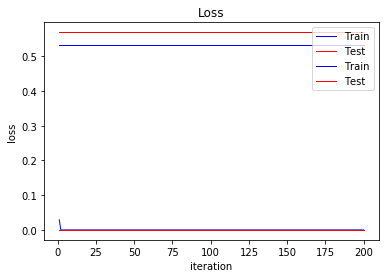

In [13]:
RankModel = ListNet()
# RankModel.fit(X, y, batchsize=10, n_epoch=1, n_units1=128, n_units2=128, tv_ratio=0.85, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model")
RankModel.fit(X, y)

In [14]:
ans=RankModel.predict(X)
for i in ans:
    print(i[0])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
# for i in range(0,len(data[4])):
#     data[4][i]=convertToNumber(data[4][i])
# for i in range(0,len(data[5])):
#     data[5][i]=convertToNumber(data[5][i])
# for i in range(0,len(data[6])):
#     data[6][i]=convertToNumber(data[6][i])
# for i in range(0,len(data[7])):
#     data[7][i]=convertToNumber(data[7][i])
# for i in range(0,len(data[10])):
#     data[10][i]=convertToNumber(data[10][i])
# for i in range(0,len(data[11])):
#     data[11][i]=convertToNumber(data[11][i])
# for i in range(0,len(data[12])):
#     data[12][i]=convertToNumber(data[12][i])
# for i in range(0,len(data[13])):
#     data[13][i]=convertToNumber(data[13][i])
# for i in range(0,len(data[16])):
#     data[16][i]=convertToNumber(data[16][i])
# for i in range(0,len(data[17])):
#     data[17][i]=convertToNumber(data[17][i])
# plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.plot(data[0], data[6])
plt.plot(data[0], data[7])
plt.plot(data[0], data[10])
plt.plot(data[0], data[11])
plt.plot(data[0], data[12])
plt.plot(data[0], data[13])
plt.plot(data[0], data[16])
plt.plot(data[0], data[17])

In [ ]:
tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
#tweet_boxes = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2','data-testid':'tweet'})
tweet_boxes = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
len(tweet_boxes)
tweet_boxes[1].findChildren('div',recursive=False)[3].attrs.get('aria-label')
for i in range(0,len(tweet_boxes)):
    print(tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label'))
#     tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label')
box = tweet_boxes[2]
#small_boxes = box.find_all('div',{'class':'css-901oao r-hkyrab r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0','lang':'en'})
if(box.find('img')):
    small_boxes = box.find('img')
    print(small_boxes)
boxes = tweet_boxes[2]
#boxes.text
#span = boxes.find_all('span',{'class':'css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'})
span = boxes.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
span[4].text
#span[len(span)-1].text.isdigit()<div dir="ltr" class="">

In [ ]:
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()

In [ ]:
logreg.fit(X, y)

In [ ]:
np.array(training_Y).shape

In [ ]:
logreg.classes_

In [ ]:
import random
# random.shuffle(training_X)
# x=logreg.predict(preprocessing.normalize(np.array(training_X)))
x=logreg.predict(X)

In [ ]:
import scipy.stats as ss
y=ss.rankdata(x)
# np.array(y).shape

In [ ]:
logreg.coef_

In [ ]:
['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']

In [ ]:
# for i in training_Y:
#     print(i)
ans=0;
for i in range(0,len(y)):
    print(y[i])
    ans=ans+(y[i]-training_Y[i])**2

In [ ]:
ans/len(y)

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
clf.predict(X[:2, :])

In [ ]:
clf.classes_

In [ ]:
np.unique(y)

In [22]:
x=[1,2,5,4,9]
N=len(x)

In [23]:
perm = np.random.permutation(N)

In [27]:
np.asarray(x[perm[1:2]])

TypeError: only integer scalar arrays can be converted to a scalar index

In [77]:
y = y[::-1]
print(y)

[2.65606354e-02 2.65543873e-02 2.65481392e-02 ... 1.87442734e-05
 1.24961823e-05 6.24809113e-06]


In [49]:
from learning2rank.rank import RankNet
m=RankNet.RankNet()



  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 9/5000 [00:00<01:00, 82.17it/s]

load dataset
The number of data, train: 4038 validate: 213
prepare initialized model!




  0%|          | 15/5000 [00:00<01:07, 73.66it/s]

  0%|          | 23/5000 [00:00<01:07, 73.82it/s]

  1%|          | 28/5000 [00:00<01:20, 61.95it/s]

  1%|          | 33/5000 [00:00<01:26, 57.15it/s]

  1%|          | 38/5000 [00:00<01:32, 53.78it/s]

  1%|          | 43/5000 [00:00<01:35, 52.02it/s]

  1%|          | 49/5000 [00:00<01:35, 51.95it/s]

  1%|          | 55/5000 [00:00<01:32, 53.20it/s]

  1%|▏         | 63/5000 [00:01<01:24, 58.14it/s]

  1%|▏         | 69/5000 [00:01<01:29, 55.19it/s]

  2%|▏         | 75/5000 [00:01<01:36, 51.03it/s]

  2%|▏         | 81/5000 [00:01<01:41, 48.53it/s]

  2%|▏         | 86/5000 [00:01<01:41, 48.22it/s]

  2%|▏         | 91/5000 [00:01<01:41, 48.14it/s]

  2%|▏         | 96/5000 [00:01<01:47, 45.77it/s]

  2%|▏         | 101/5000 [00:02<02:22, 34.45it/s]

  2%|▏         | 107/5000 [00:02<02:07, 38.52it/s]

step: 100
NDCG@100 | train: 0.5734078424777465, test: 0.6428718955643835




  2%|▏         | 112/5000 [00:02<02:07, 38.32it/s]

  2%|▏         | 117/5000 [00:02<02:11, 37.11it/s]

  2%|▏         | 123/5000 [00:02<01:56, 41.77it/s]

  3%|▎         | 130/5000 [00:02<01:43, 47.19it/s]

  3%|▎         | 138/5000 [00:02<01:32, 52.55it/s]

  3%|▎         | 144/5000 [00:02<01:35, 50.78it/s]

  3%|▎         | 150/5000 [00:02<01:33, 51.67it/s]

  3%|▎         | 157/5000 [00:03<01:27, 55.20it/s]

  3%|▎         | 163/5000 [00:03<01:25, 56.55it/s]

  3%|▎         | 171/5000 [00:03<01:18, 61.72it/s]

  4%|▎         | 180/5000 [00:03<01:11, 67.29it/s]

  4%|▍         | 188/5000 [00:03<01:32, 51.79it/s]

  4%|▍         | 194/5000 [00:03<01:53, 42.18it/s]

  4%|▍         | 200/5000 [00:04<02:34, 31.05it/s]

  4%|▍         | 205/5000 [00:04<02:22, 33.63it/s]

step: 200
NDCG@100 | train: 0.8774578465030091, test: 0.694068868091518




  4%|▍         | 210/5000 [00:04<02:25, 32.81it/s]

  4%|▍         | 214/5000 [00:04<02:30, 31.87it/s]

  4%|▍         | 218/5000 [00:04<02:26, 32.71it/s]

  4%|▍         | 223/5000 [00:04<02:13, 35.71it/s]

  5%|▍         | 229/5000 [00:04<01:58, 40.14it/s]

  5%|▍         | 235/5000 [00:04<01:48, 43.81it/s]

  5%|▍         | 240/5000 [00:05<01:45, 45.11it/s]

  5%|▍         | 245/5000 [00:05<01:44, 45.54it/s]

  5%|▌         | 250/5000 [00:05<01:50, 43.02it/s]

  5%|▌         | 255/5000 [00:05<01:53, 41.93it/s]

  5%|▌         | 260/5000 [00:05<01:49, 43.11it/s]

  5%|▌         | 265/5000 [00:05<01:48, 43.62it/s]

  5%|▌         | 273/5000 [00:05<01:34, 49.97it/s]

  6%|▌         | 281/5000 [00:05<01:25, 55.45it/s]

  6%|▌         | 287/5000 [00:06<01:26, 54.19it/s]

  6%|▌         | 294/5000 [00:06<01:24, 55.44it/s]

  6%|▌         | 300/5000 [00:06<01:44, 44.82it/s]

  6%|▌         | 308/5000 [00:06<01:32, 50.54it/s]

step: 300
NDCG@100 | train: 0.8761468246764572, test: 0.6729171174635356




  6%|▋         | 314/5000 [00:06<01:42, 45.71it/s]

  6%|▋         | 320/5000 [00:06<01:38, 47.35it/s]

  7%|▋         | 326/5000 [00:06<01:36, 48.47it/s]

  7%|▋         | 332/5000 [00:06<01:37, 47.74it/s]

  7%|▋         | 340/5000 [00:07<01:27, 53.53it/s]

  7%|▋         | 346/5000 [00:07<01:33, 49.61it/s]

  7%|▋         | 352/5000 [00:07<01:29, 51.65it/s]

  7%|▋         | 358/5000 [00:07<01:34, 48.88it/s]

  7%|▋         | 364/5000 [00:07<01:31, 50.69it/s]

  7%|▋         | 370/5000 [00:07<01:36, 48.21it/s]

  8%|▊         | 375/5000 [00:07<01:35, 48.63it/s]

  8%|▊         | 380/5000 [00:07<01:34, 48.93it/s]

  8%|▊         | 386/5000 [00:08<01:34, 48.68it/s]

  8%|▊         | 394/5000 [00:08<01:24, 54.20it/s]

  8%|▊         | 400/5000 [00:08<01:47, 42.76it/s]

  8%|▊         | 408/5000 [00:08<01:33, 48.87it/s]

step: 400
NDCG@100 | train: 0.8761353656127336, test: 0.6653898014790404




  8%|▊         | 417/5000 [00:08<01:24, 54.00it/s]

  8%|▊         | 424/5000 [00:08<01:23, 54.61it/s]

  9%|▊         | 430/5000 [00:08<01:24, 53.83it/s]

  9%|▊         | 436/5000 [00:08<01:24, 53.83it/s]

  9%|▉         | 444/5000 [00:09<01:17, 59.02it/s]

  9%|▉         | 451/5000 [00:09<01:15, 60.64it/s]

  9%|▉         | 458/5000 [00:09<01:14, 61.25it/s]

  9%|▉         | 465/5000 [00:09<01:13, 61.81it/s]

  9%|▉         | 472/5000 [00:09<01:16, 59.11it/s]

 10%|▉         | 481/5000 [00:09<01:10, 64.51it/s]

 10%|▉         | 488/5000 [00:09<01:25, 53.07it/s]

 10%|▉         | 494/5000 [00:09<01:23, 54.20it/s]

 10%|█         | 500/5000 [00:10<01:59, 37.64it/s]

 10%|█         | 505/5000 [00:10<01:55, 39.06it/s]

step: 500
NDCG@100 | train: 0.8762041377134674, test: 0.6729171174635356




 10%|█         | 510/5000 [00:10<02:09, 34.68it/s]

 10%|█         | 515/5000 [00:10<02:05, 35.62it/s]

 10%|█         | 519/5000 [00:10<02:01, 36.79it/s]

 10%|█         | 523/5000 [00:10<02:17, 32.59it/s]

 11%|█         | 528/5000 [00:10<02:04, 35.89it/s]

 11%|█         | 533/5000 [00:11<02:00, 37.19it/s]

 11%|█         | 541/5000 [00:11<01:42, 43.63it/s]

 11%|█         | 550/5000 [00:11<01:27, 51.09it/s]

 11%|█         | 558/5000 [00:11<01:18, 56.39it/s]

 11%|█▏        | 565/5000 [00:11<01:22, 54.00it/s]

 11%|█▏        | 571/5000 [00:11<01:34, 47.00it/s]

 12%|█▏        | 577/5000 [00:11<01:42, 42.96it/s]

 12%|█▏        | 582/5000 [00:12<01:58, 37.36it/s]

 12%|█▏        | 587/5000 [00:12<02:11, 33.58it/s]

 12%|█▏        | 591/5000 [00:12<02:05, 35.27it/s]

 12%|█▏        | 596/5000 [00:12<01:56, 37.80it/s]

 12%|█▏        | 601/5000 [00:12<02:36, 28.04it/s]

 12%|█▏        | 605/5000 [00:12<02:32, 28.89it/s]

step: 600
NDCG@100 | train: 0.8764365151773499, test: 0.7107983146391137




 12%|█▏        | 613/5000 [00:12<02:03, 35.56it/s]

 12%|█▏        | 621/5000 [00:13<01:43, 42.51it/s]

 13%|█▎        | 628/5000 [00:13<01:33, 46.57it/s]

 13%|█▎        | 634/5000 [00:13<01:58, 36.88it/s]

 13%|█▎        | 639/5000 [00:13<02:03, 35.44it/s]

 13%|█▎        | 644/5000 [00:13<01:53, 38.46it/s]

 13%|█▎        | 651/5000 [00:13<01:39, 43.78it/s]

 13%|█▎        | 658/5000 [00:13<01:28, 49.15it/s]

 13%|█▎        | 667/5000 [00:14<01:17, 55.99it/s]

 13%|█▎        | 674/5000 [00:14<01:19, 54.19it/s]

 14%|█▎        | 681/5000 [00:14<01:15, 57.08it/s]

 14%|█▍        | 688/5000 [00:14<01:13, 58.31it/s]

 14%|█▍        | 695/5000 [00:14<01:16, 56.62it/s]

 14%|█▍        | 701/5000 [00:14<01:48, 39.57it/s]

 14%|█▍        | 706/5000 [00:14<01:49, 39.18it/s]

step: 700
NDCG@100 | train: 0.8764484402936742, test: 0.7102267665287925




 14%|█▍        | 711/5000 [00:15<01:49, 39.13it/s]

 14%|█▍        | 716/5000 [00:15<01:51, 38.47it/s]

 14%|█▍        | 723/5000 [00:15<01:38, 43.46it/s]

 15%|█▍        | 728/5000 [00:15<01:41, 42.08it/s]

 15%|█▍        | 733/5000 [00:15<01:38, 43.21it/s]

 15%|█▍        | 738/5000 [00:15<01:35, 44.48it/s]

 15%|█▍        | 744/5000 [00:15<01:28, 47.96it/s]

 15%|█▍        | 749/5000 [00:15<01:32, 45.99it/s]

 15%|█▌        | 755/5000 [00:15<01:28, 48.20it/s]

 15%|█▌        | 760/5000 [00:16<01:32, 45.91it/s]

 15%|█▌        | 765/5000 [00:16<01:44, 40.64it/s]

 15%|█▌        | 770/5000 [00:16<01:38, 42.93it/s]

 16%|█▌        | 775/5000 [00:16<01:38, 43.01it/s]

 16%|█▌        | 780/5000 [00:16<01:39, 42.39it/s]

 16%|█▌        | 785/5000 [00:16<01:38, 42.84it/s]

 16%|█▌        | 790/5000 [00:16<01:38, 42.74it/s]

 16%|█▌        | 796/5000 [00:16<01:33, 45.08it/s]

 16%|█▌        | 801/5000 [00:17<01:55, 36.34it/s]

 16%|█▌        | 805/5000 [00:17<02:02, 34.22it/s]

step: 800
NDCG@100 | train: 0.8762235197693328, test: 0.6968745360667691




 16%|█▌        | 811/5000 [00:17<01:49, 38.11it/s]

 16%|█▋        | 816/5000 [00:17<01:50, 37.78it/s]

 16%|█▋        | 820/5000 [00:17<01:57, 35.66it/s]

 16%|█▋        | 825/5000 [00:17<01:51, 37.48it/s]

 17%|█▋        | 830/5000 [00:17<01:43, 40.12it/s]

 17%|█▋        | 835/5000 [00:17<01:42, 40.52it/s]

 17%|█▋        | 840/5000 [00:18<01:39, 41.76it/s]

 17%|█▋        | 845/5000 [00:18<01:38, 42.29it/s]

 17%|█▋        | 850/5000 [00:18<01:38, 42.07it/s]

 17%|█▋        | 855/5000 [00:18<01:38, 41.90it/s]

 17%|█▋        | 860/5000 [00:18<01:35, 43.17it/s]

 17%|█▋        | 865/5000 [00:18<01:32, 44.49it/s]

 17%|█▋        | 870/5000 [00:18<01:33, 44.35it/s]

 18%|█▊        | 875/5000 [00:18<01:31, 45.30it/s]

 18%|█▊        | 880/5000 [00:18<01:29, 46.19it/s]

 18%|█▊        | 885/5000 [00:19<01:31, 44.93it/s]

 18%|█▊        | 890/5000 [00:19<01:40, 40.70it/s]

 18%|█▊        | 895/5000 [00:19<01:39, 41.37it/s]

 18%|█▊        | 900/5000 [00:19<01:55, 35.64it/s]

 18%|█▊   

step: 900
NDCG@100 | train: 0.8762321526826354, test: 0.7117358347514704




 18%|█▊        | 908/5000 [00:19<01:58, 34.50it/s]

 18%|█▊        | 913/5000 [00:19<01:50, 37.05it/s]

 18%|█▊        | 918/5000 [00:19<01:42, 39.69it/s]

 18%|█▊        | 923/5000 [00:20<01:40, 40.63it/s]

 19%|█▊        | 931/5000 [00:20<01:26, 47.02it/s]

 19%|█▊        | 937/5000 [00:20<01:26, 46.86it/s]

 19%|█▉        | 942/5000 [00:20<01:26, 47.01it/s]

 19%|█▉        | 948/5000 [00:20<01:22, 49.10it/s]

 19%|█▉        | 954/5000 [00:20<01:21, 49.46it/s]

 19%|█▉        | 960/5000 [00:20<01:20, 50.20it/s]

 19%|█▉        | 966/5000 [00:20<01:28, 45.62it/s]

 19%|█▉        | 971/5000 [00:21<01:34, 42.74it/s]

 20%|█▉        | 976/5000 [00:21<01:34, 42.50it/s]

 20%|█▉        | 981/5000 [00:21<01:31, 44.01it/s]

 20%|█▉        | 990/5000 [00:21<01:18, 51.22it/s]

 20%|█▉        | 997/5000 [00:21<01:13, 54.35it/s]

 20%|██        | 1003/5000 [00:21<01:27, 45.82it/s]

 20%|██        | 1009/5000 [00:21<01:25, 46.44it/s]

step: 1000
NDCG@100 | train: 0.8761378217468623, test: 0.70164482020146




 20%|██        | 1017/5000 [00:21<01:16, 52.06it/s]

 20%|██        | 1025/5000 [00:22<01:09, 57.41it/s]

 21%|██        | 1033/5000 [00:22<01:04, 61.55it/s]

 21%|██        | 1040/5000 [00:22<01:09, 56.86it/s]

 21%|██        | 1047/5000 [00:22<01:12, 54.30it/s]

 21%|██        | 1053/5000 [00:22<01:20, 48.80it/s]

 21%|██        | 1059/5000 [00:22<01:19, 49.62it/s]

 21%|██▏       | 1067/5000 [00:22<01:12, 54.26it/s]

 21%|██▏       | 1073/5000 [00:22<01:10, 55.45it/s]

 22%|██▏       | 1079/5000 [00:23<01:10, 55.76it/s]

 22%|██▏       | 1085/5000 [00:23<01:16, 51.38it/s]

 22%|██▏       | 1091/5000 [00:23<01:20, 48.65it/s]

 22%|██▏       | 1097/5000 [00:23<01:16, 50.89it/s]

 22%|██▏       | 1103/5000 [00:23<01:37, 40.02it/s]



step: 1100
NDCG@100 | train: 0.8761064617264622, test: 0.7246849087564629


 22%|██▏       | 1108/5000 [00:23<01:45, 36.84it/s]

 22%|██▏       | 1113/5000 [00:23<01:44, 37.13it/s]

 22%|██▏       | 1117/5000 [00:24<01:42, 37.83it/s]

 22%|██▏       | 1122/5000 [00:24<01:36, 40.05it/s]

 23%|██▎       | 1127/5000 [00:24<01:39, 38.92it/s]

 23%|██▎       | 1132/5000 [00:24<01:38, 39.36it/s]

 23%|██▎       | 1137/5000 [00:24<01:39, 38.68it/s]

 23%|██▎       | 1141/5000 [00:24<01:53, 33.96it/s]

 23%|██▎       | 1145/5000 [00:24<02:03, 31.27it/s]

 23%|██▎       | 1149/5000 [00:25<02:13, 28.75it/s]

 23%|██▎       | 1153/5000 [00:25<02:11, 29.25it/s]

 23%|██▎       | 1157/5000 [00:25<02:02, 31.27it/s]

 23%|██▎       | 1161/5000 [00:25<01:56, 32.93it/s]

 23%|██▎       | 1165/5000 [00:25<01:51, 34.40it/s]

 23%|██▎       | 1169/5000 [00:25<01:55, 33.11it/s]

 23%|██▎       | 1173/5000 [00:25<01:53, 33.81it/s]

 24%|██▎       | 1179/5000 [00:25<01:38, 38.86it/s]

 24%|██▎       | 1187/5000 [00:25<01:23, 45.93it/s]

 24%|██▍       | 1196/5000 [00:26<01:10, 53.59

step: 1200
NDCG@100 | train: 0.8956248590847595, test: 0.7155554762359334




 24%|██▍       | 1215/5000 [00:26<01:31, 41.48it/s]

 24%|██▍       | 1220/5000 [00:26<01:37, 38.71it/s]

 24%|██▍       | 1225/5000 [00:26<01:33, 40.57it/s]

 25%|██▍       | 1232/5000 [00:26<01:22, 45.82it/s]

 25%|██▍       | 1240/5000 [00:26<01:12, 51.63it/s]

 25%|██▍       | 1246/5000 [00:27<01:10, 52.92it/s]

 25%|██▌       | 1252/5000 [00:27<01:12, 51.45it/s]

 25%|██▌       | 1258/5000 [00:27<01:23, 44.62it/s]

 25%|██▌       | 1263/5000 [00:27<01:24, 44.32it/s]

 25%|██▌       | 1268/5000 [00:27<01:25, 43.82it/s]

 25%|██▌       | 1273/5000 [00:27<01:25, 43.74it/s]

 26%|██▌       | 1278/5000 [00:27<01:35, 38.89it/s]

 26%|██▌       | 1283/5000 [00:28<01:50, 33.76it/s]

 26%|██▌       | 1287/5000 [00:28<01:52, 33.04it/s]

 26%|██▌       | 1291/5000 [00:28<01:57, 31.69it/s]

 26%|██▌       | 1295/5000 [00:28<01:50, 33.43it/s]

 26%|██▌       | 1300/5000 [00:28<01:51, 33.20it/s]

 26%|██▌       | 1305/5000 [00:28<01:41, 36.56it/s]

step: 1300
NDCG@100 | train: 0.8951200921810133, test: 0.7163109529102688




 26%|██▌       | 1309/5000 [00:28<01:46, 34.52it/s]

 26%|██▋       | 1313/5000 [00:28<01:52, 32.74it/s]

 26%|██▋       | 1317/5000 [00:29<01:51, 33.02it/s]

 26%|██▋       | 1322/5000 [00:29<01:40, 36.67it/s]

 27%|██▋       | 1327/5000 [00:29<01:33, 39.14it/s]

 27%|██▋       | 1332/5000 [00:29<01:31, 40.23it/s]

 27%|██▋       | 1339/5000 [00:29<01:20, 45.76it/s]

 27%|██▋       | 1344/5000 [00:29<01:18, 46.51it/s]

 27%|██▋       | 1351/5000 [00:29<01:11, 51.09it/s]

 27%|██▋       | 1358/5000 [00:29<01:06, 55.14it/s]

 27%|██▋       | 1365/5000 [00:29<01:02, 58.56it/s]

 27%|██▋       | 1372/5000 [00:30<00:59, 61.47it/s]

 28%|██▊       | 1379/5000 [00:30<00:57, 63.39it/s]

 28%|██▊       | 1387/5000 [00:30<00:53, 67.30it/s]

 28%|██▊       | 1394/5000 [00:30<00:53, 67.37it/s]

 28%|██▊       | 1401/5000 [00:30<01:09, 51.76it/s]

 28%|██▊       | 1407/5000 [00:30<01:11, 50.37it/s]

step: 1400
NDCG@100 | train: 0.9049129385211143, test: 0.7029967383392234




 28%|██▊       | 1413/5000 [00:30<01:15, 47.53it/s]

 28%|██▊       | 1419/5000 [00:30<01:12, 49.37it/s]

 29%|██▊       | 1428/5000 [00:31<01:03, 56.16it/s]

 29%|██▊       | 1437/5000 [00:31<00:58, 61.41it/s]

 29%|██▉       | 1445/5000 [00:31<00:54, 65.62it/s]

 29%|██▉       | 1452/5000 [00:31<00:54, 64.73it/s]

 29%|██▉       | 1461/5000 [00:31<00:51, 69.04it/s]

 29%|██▉       | 1469/5000 [00:31<00:57, 61.05it/s]

 30%|██▉       | 1476/5000 [00:31<00:56, 62.90it/s]

 30%|██▉       | 1485/5000 [00:31<00:51, 67.96it/s]

 30%|██▉       | 1493/5000 [00:32<00:56, 61.85it/s]

 30%|███       | 1500/5000 [00:32<01:14, 46.79it/s]

 30%|███       | 1506/5000 [00:32<01:15, 46.36it/s]

step: 1500
NDCG@100 | train: 0.9041061846924171, test: 0.7263350379195563




 30%|███       | 1512/5000 [00:32<01:20, 43.14it/s]

 30%|███       | 1517/5000 [00:32<01:22, 42.47it/s]

 30%|███       | 1522/5000 [00:32<01:24, 40.93it/s]

 31%|███       | 1528/5000 [00:32<01:18, 44.46it/s]

 31%|███       | 1534/5000 [00:33<01:13, 47.28it/s]

 31%|███       | 1539/5000 [00:33<01:13, 46.85it/s]

 31%|███       | 1544/5000 [00:33<01:14, 46.24it/s]

 31%|███       | 1550/5000 [00:33<01:10, 48.90it/s]

 31%|███       | 1556/5000 [00:33<01:21, 42.46it/s]

 31%|███       | 1561/5000 [00:33<01:20, 42.92it/s]

 31%|███▏      | 1566/5000 [00:33<01:26, 39.49it/s]

 31%|███▏      | 1571/5000 [00:33<01:34, 36.22it/s]

 32%|███▏      | 1575/5000 [00:34<01:34, 36.29it/s]

 32%|███▏      | 1580/5000 [00:34<01:26, 39.48it/s]

 32%|███▏      | 1585/5000 [00:34<01:23, 40.98it/s]

 32%|███▏      | 1590/5000 [00:34<01:24, 40.36it/s]

 32%|███▏      | 1595/5000 [00:34<01:27, 38.75it/s]

 32%|███▏      | 1599/5000 [00:34<01:33, 36.26it/s]

 32%|███▏      | 1603/5000 [00:34<01:53, 29.

step: 1600
NDCG@100 | train: 0.9019944466444346, test: 0.7266842285531903




 32%|███▏      | 1611/5000 [00:35<01:50, 30.63it/s]

 32%|███▏      | 1615/5000 [00:35<01:49, 31.04it/s]

 32%|███▏      | 1620/5000 [00:35<01:38, 34.35it/s]

 32%|███▏      | 1624/5000 [00:35<01:37, 34.68it/s]

 33%|███▎      | 1628/5000 [00:35<01:38, 34.09it/s]

 33%|███▎      | 1633/5000 [00:35<01:29, 37.42it/s]

 33%|███▎      | 1640/5000 [00:35<01:18, 42.69it/s]

 33%|███▎      | 1645/5000 [00:35<01:17, 43.04it/s]

 33%|███▎      | 1650/5000 [00:36<01:16, 43.83it/s]

 33%|███▎      | 1655/5000 [00:36<01:13, 45.42it/s]

 33%|███▎      | 1660/5000 [00:36<01:22, 40.61it/s]

 33%|███▎      | 1665/5000 [00:36<01:18, 42.38it/s]

 33%|███▎      | 1670/5000 [00:36<01:16, 43.42it/s]

 34%|███▎      | 1675/5000 [00:36<01:16, 43.40it/s]

 34%|███▎      | 1680/5000 [00:36<01:16, 43.13it/s]

 34%|███▎      | 1686/5000 [00:36<01:15, 43.93it/s]

 34%|███▍      | 1691/5000 [00:37<01:18, 41.94it/s]

 34%|███▍      | 1696/5000 [00:37<01:18, 42.01it/s]

 34%|███▍      | 1701/5000 [00:37<01:33, 35.

step: 1700
NDCG@100 | train: 0.8980756616956621, test: 0.7033459289728573




 34%|███▍      | 1712/5000 [00:37<01:22, 39.96it/s]

 34%|███▍      | 1717/5000 [00:37<01:18, 42.07it/s]

 34%|███▍      | 1722/5000 [00:37<01:14, 43.82it/s]

 35%|███▍      | 1727/5000 [00:37<01:13, 44.61it/s]

 35%|███▍      | 1733/5000 [00:37<01:08, 47.96it/s]

 35%|███▍      | 1738/5000 [00:38<01:12, 44.80it/s]

 35%|███▍      | 1744/5000 [00:38<01:08, 47.45it/s]

 35%|███▌      | 1750/5000 [00:38<01:05, 49.72it/s]

 35%|███▌      | 1756/5000 [00:38<01:02, 51.60it/s]

 35%|███▌      | 1762/5000 [00:38<01:02, 52.00it/s]

 35%|███▌      | 1768/5000 [00:38<01:02, 51.71it/s]

 35%|███▌      | 1774/5000 [00:38<01:07, 47.70it/s]

 36%|███▌      | 1779/5000 [00:38<01:09, 46.34it/s]

 36%|███▌      | 1785/5000 [00:39<01:05, 48.76it/s]

 36%|███▌      | 1791/5000 [00:39<01:06, 48.48it/s]

 36%|███▌      | 1796/5000 [00:39<01:08, 46.69it/s]

 36%|███▌      | 1801/5000 [00:39<01:30, 35.23it/s]

 36%|███▌      | 1805/5000 [00:39<01:30, 35.26it/s]

step: 1800
NDCG@100 | train: 0.8962137469265986, test: 0.7163183858075886




 36%|███▌      | 1809/5000 [00:39<01:27, 36.45it/s]

 36%|███▋      | 1815/5000 [00:39<01:19, 39.99it/s]

 36%|███▋      | 1820/5000 [00:39<01:22, 38.47it/s]

 37%|███▋      | 1826/5000 [00:40<01:13, 42.94it/s]

 37%|███▋      | 1831/5000 [00:40<01:15, 41.78it/s]

 37%|███▋      | 1837/5000 [00:40<01:08, 45.93it/s]

 37%|███▋      | 1843/5000 [00:40<01:04, 49.20it/s]

 37%|███▋      | 1849/5000 [00:40<01:04, 49.01it/s]

 37%|███▋      | 1855/5000 [00:40<01:05, 47.84it/s]

 37%|███▋      | 1861/5000 [00:40<01:02, 49.91it/s]

 37%|███▋      | 1867/5000 [00:40<01:06, 47.18it/s]

 37%|███▋      | 1872/5000 [00:41<01:06, 47.00it/s]

 38%|███▊      | 1878/5000 [00:41<01:02, 49.67it/s]

 38%|███▊      | 1884/5000 [00:41<01:01, 50.37it/s]

 38%|███▊      | 1890/5000 [00:41<01:05, 47.28it/s]

 38%|███▊      | 1895/5000 [00:41<01:10, 44.33it/s]

 38%|███▊      | 1900/5000 [00:41<01:25, 36.40it/s]

 38%|███▊      | 1904/5000 [00:41<01:25, 36.21it/s]

step: 1900
NDCG@100 | train: 0.8978112852576782, test: 0.7268497492613396




 38%|███▊      | 1909/5000 [00:41<01:19, 38.87it/s]

 38%|███▊      | 1914/5000 [00:42<01:16, 40.57it/s]

 38%|███▊      | 1919/5000 [00:42<01:12, 42.39it/s]

 38%|███▊      | 1925/5000 [00:42<01:07, 45.81it/s]

 39%|███▊      | 1930/5000 [00:42<01:08, 44.82it/s]

 39%|███▊      | 1935/5000 [00:42<01:10, 43.67it/s]

 39%|███▉      | 1940/5000 [00:42<01:08, 44.95it/s]

 39%|███▉      | 1946/5000 [00:42<01:04, 47.34it/s]

 39%|███▉      | 1951/5000 [00:42<01:09, 43.88it/s]

 39%|███▉      | 1956/5000 [00:42<01:08, 44.69it/s]

 39%|███▉      | 1962/5000 [00:43<01:03, 48.15it/s]

 39%|███▉      | 1967/5000 [00:43<01:05, 46.43it/s]

 39%|███▉      | 1973/5000 [00:43<01:02, 48.73it/s]

 40%|███▉      | 1978/5000 [00:43<01:03, 47.55it/s]

 40%|███▉      | 1983/5000 [00:43<01:13, 41.27it/s]

 40%|███▉      | 1988/5000 [00:43<01:12, 41.36it/s]

 40%|███▉      | 1993/5000 [00:43<01:10, 42.88it/s]

 40%|███▉      | 1998/5000 [00:43<01:08, 43.87it/s]

 40%|████      | 2003/5000 [00:44<01:23, 35.

step: 2000
NDCG@100 | train: 0.9036586614865946, test: 0.7269390455945928




 40%|████      | 2014/5000 [00:44<01:11, 41.69it/s]

 40%|████      | 2021/5000 [00:44<01:03, 47.03it/s]

 41%|████      | 2029/5000 [00:44<00:55, 53.07it/s]

 41%|████      | 2035/5000 [00:44<00:57, 51.37it/s]

 41%|████      | 2041/5000 [00:44<00:57, 51.24it/s]

 41%|████      | 2047/5000 [00:44<01:05, 44.85it/s]

 41%|████      | 2054/5000 [00:45<00:58, 50.18it/s]

 41%|████      | 2060/5000 [00:45<00:56, 52.19it/s]

 41%|████▏     | 2067/5000 [00:45<00:53, 54.94it/s]

 41%|████▏     | 2073/5000 [00:45<00:56, 51.76it/s]

 42%|████▏     | 2079/5000 [00:45<01:02, 46.44it/s]

 42%|████▏     | 2084/5000 [00:45<01:11, 40.78it/s]

 42%|████▏     | 2089/5000 [00:45<01:16, 38.17it/s]

 42%|████▏     | 2094/5000 [00:45<01:14, 39.05it/s]

 42%|████▏     | 2099/5000 [00:46<01:13, 39.63it/s]

 42%|████▏     | 2104/5000 [00:46<01:24, 34.35it/s]

 42%|████▏     | 2108/5000 [00:46<01:21, 35.53it/s]

step: 2100
NDCG@100 | train: 0.9092527021148544, test: 0.7265439002908828




 42%|████▏     | 2113/5000 [00:46<01:16, 37.66it/s]

 42%|████▏     | 2118/5000 [00:46<01:13, 39.08it/s]

 42%|████▏     | 2123/5000 [00:46<01:12, 39.62it/s]

 43%|████▎     | 2128/5000 [00:46<01:13, 38.82it/s]

 43%|████▎     | 2132/5000 [00:46<01:15, 38.22it/s]

 43%|████▎     | 2136/5000 [00:47<01:25, 33.69it/s]

 43%|████▎     | 2141/5000 [00:47<01:17, 36.78it/s]

 43%|████▎     | 2148/5000 [00:47<01:07, 42.03it/s]

 43%|████▎     | 2153/5000 [00:47<01:07, 42.40it/s]

 43%|████▎     | 2158/5000 [00:47<01:05, 43.17it/s]

 43%|████▎     | 2163/5000 [00:47<01:04, 44.08it/s]

 43%|████▎     | 2168/5000 [00:47<01:08, 41.23it/s]

 43%|████▎     | 2173/5000 [00:47<01:11, 39.67it/s]

 44%|████▎     | 2178/5000 [00:48<01:12, 39.11it/s]

 44%|████▎     | 2183/5000 [00:48<01:07, 41.83it/s]

 44%|████▍     | 2190/5000 [00:48<01:00, 46.50it/s]

 44%|████▍     | 2195/5000 [00:48<01:04, 43.50it/s]

 44%|████▍     | 2200/5000 [00:48<01:19, 35.02it/s]

 44%|████▍     | 2204/5000 [00:48<01:20, 34.

step: 2200
NDCG@100 | train: 0.90217773210448, test: 0.7264493483673562




 44%|████▍     | 2211/5000 [00:48<01:09, 40.06it/s]

 44%|████▍     | 2218/5000 [00:48<01:02, 44.60it/s]

 44%|████▍     | 2223/5000 [00:49<01:03, 43.97it/s]

 45%|████▍     | 2228/5000 [00:49<01:05, 42.25it/s]

 45%|████▍     | 2233/5000 [00:49<01:03, 43.44it/s]

 45%|████▍     | 2240/5000 [00:49<00:57, 48.01it/s]

 45%|████▍     | 2246/5000 [00:49<00:54, 50.34it/s]

 45%|████▌     | 2252/5000 [00:49<00:53, 51.29it/s]

 45%|████▌     | 2258/5000 [00:49<00:52, 51.79it/s]

 45%|████▌     | 2264/5000 [00:49<00:52, 52.36it/s]

 45%|████▌     | 2270/5000 [00:49<00:52, 52.30it/s]

 46%|████▌     | 2276/5000 [00:50<00:50, 53.55it/s]

 46%|████▌     | 2282/5000 [00:50<00:51, 52.99it/s]

 46%|████▌     | 2288/5000 [00:50<00:51, 52.22it/s]

 46%|████▌     | 2296/5000 [00:50<00:46, 57.65it/s]

 46%|████▌     | 2302/5000 [00:50<00:57, 46.75it/s]

 46%|████▌     | 2308/5000 [00:50<01:00, 44.43it/s]

step: 2300
NDCG@100 | train: 0.9060816869645866, test: 0.7269390455945928




 46%|████▋     | 2313/5000 [00:50<01:00, 44.56it/s]

 46%|████▋     | 2319/5000 [00:50<00:55, 48.13it/s]

 46%|████▋     | 2325/5000 [00:51<00:58, 45.59it/s]

 47%|████▋     | 2330/5000 [00:51<00:59, 44.56it/s]

 47%|████▋     | 2335/5000 [00:51<00:58, 45.34it/s]

 47%|████▋     | 2340/5000 [00:51<01:00, 44.30it/s]

 47%|████▋     | 2345/5000 [00:51<01:04, 40.98it/s]

 47%|████▋     | 2350/5000 [00:51<01:03, 41.46it/s]

 47%|████▋     | 2355/5000 [00:51<01:07, 38.99it/s]

 47%|████▋     | 2359/5000 [00:51<01:09, 38.27it/s]

 47%|████▋     | 2364/5000 [00:52<01:04, 40.86it/s]

 47%|████▋     | 2369/5000 [00:52<01:01, 42.95it/s]

 47%|████▋     | 2374/5000 [00:52<01:00, 43.08it/s]

 48%|████▊     | 2379/5000 [00:52<01:04, 40.83it/s]

 48%|████▊     | 2386/5000 [00:52<00:56, 46.45it/s]

 48%|████▊     | 2391/5000 [00:52<00:59, 43.59it/s]

 48%|████▊     | 2396/5000 [00:52<00:59, 44.04it/s]

 48%|████▊     | 2401/5000 [00:52<01:10, 37.09it/s]

 48%|████▊     | 2406/5000 [00:53<01:07, 38.

step: 2400
NDCG@100 | train: 0.9050101639330443, test: 0.7266802579760802




 48%|████▊     | 2411/5000 [00:53<01:03, 40.96it/s]

 48%|████▊     | 2417/5000 [00:53<01:00, 42.99it/s]

 48%|████▊     | 2423/5000 [00:53<00:55, 46.33it/s]

 49%|████▊     | 2428/5000 [00:53<00:55, 46.61it/s]

 49%|████▊     | 2434/5000 [00:53<00:53, 48.38it/s]

 49%|████▉     | 2441/5000 [00:53<00:49, 51.31it/s]

 49%|████▉     | 2448/5000 [00:53<00:46, 54.88it/s]

 49%|████▉     | 2454/5000 [00:53<00:46, 54.75it/s]

 49%|████▉     | 2460/5000 [00:54<00:49, 51.06it/s]

 49%|████▉     | 2466/5000 [00:54<00:50, 50.52it/s]

 49%|████▉     | 2472/5000 [00:54<00:49, 51.27it/s]

 50%|████▉     | 2478/5000 [00:54<00:47, 53.30it/s]

 50%|████▉     | 2484/5000 [00:54<00:49, 51.10it/s]

 50%|████▉     | 2490/5000 [00:54<00:48, 51.33it/s]

 50%|████▉     | 2496/5000 [00:54<00:51, 48.98it/s]

 50%|█████     | 2501/5000 [00:55<01:07, 37.28it/s]

 50%|█████     | 2506/5000 [00:55<01:05, 38.32it/s]

step: 2500
NDCG@100 | train: 0.8900699415837738, test: 0.7168213555717167




 50%|█████     | 2511/5000 [00:55<01:04, 38.66it/s]

 50%|█████     | 2517/5000 [00:55<00:58, 42.09it/s]

 50%|█████     | 2523/5000 [00:55<00:54, 45.72it/s]

 51%|█████     | 2529/5000 [00:55<00:51, 48.05it/s]

 51%|█████     | 2535/5000 [00:55<00:53, 46.43it/s]

 51%|█████     | 2540/5000 [00:55<00:54, 44.81it/s]

 51%|█████     | 2545/5000 [00:55<00:55, 44.29it/s]

 51%|█████     | 2552/5000 [00:56<00:49, 49.23it/s]

 51%|█████     | 2560/5000 [00:56<00:43, 55.48it/s]

 51%|█████▏    | 2566/5000 [00:56<00:44, 54.67it/s]

 51%|█████▏    | 2572/5000 [00:56<00:45, 53.08it/s]

 52%|█████▏    | 2579/5000 [00:56<00:43, 56.27it/s]

 52%|█████▏    | 2585/5000 [00:56<00:43, 56.10it/s]

 52%|█████▏    | 2591/5000 [00:56<00:43, 54.99it/s]

 52%|█████▏    | 2597/5000 [00:56<00:46, 51.72it/s]

 52%|█████▏    | 2603/5000 [00:57<00:54, 43.66it/s]

 52%|█████▏    | 2608/5000 [00:57<00:54, 43.50it/s]

step: 2600
NDCG@100 | train: 0.8992291595836578, test: 0.7266842285531903




 52%|█████▏    | 2613/5000 [00:57<00:52, 45.05it/s]

 52%|█████▏    | 2618/5000 [00:57<00:55, 42.91it/s]

 52%|█████▏    | 2623/5000 [00:57<00:55, 42.94it/s]

 53%|█████▎    | 2628/5000 [00:57<00:57, 41.04it/s]

 53%|█████▎    | 2634/5000 [00:57<00:52, 44.83it/s]

 53%|█████▎    | 2640/5000 [00:57<00:49, 47.86it/s]

 53%|█████▎    | 2645/5000 [00:57<00:49, 47.84it/s]

 53%|█████▎    | 2650/5000 [00:58<00:50, 46.13it/s]

 53%|█████▎    | 2655/5000 [00:58<00:50, 46.39it/s]

 53%|█████▎    | 2661/5000 [00:58<00:48, 48.49it/s]

 53%|█████▎    | 2666/5000 [00:58<00:48, 48.54it/s]

 53%|█████▎    | 2672/5000 [00:58<00:46, 50.14it/s]

 54%|█████▎    | 2678/5000 [00:58<00:50, 46.25it/s]

 54%|█████▎    | 2683/5000 [00:58<00:50, 46.14it/s]

 54%|█████▍    | 2688/5000 [00:58<00:49, 46.49it/s]

 54%|█████▍    | 2694/5000 [00:59<00:47, 48.23it/s]

 54%|█████▍    | 2699/5000 [00:59<00:53, 42.90it/s]

 54%|█████▍    | 2704/5000 [00:59<00:58, 39.26it/s]

 54%|█████▍    | 2712/5000 [00:59<00:50, 45.

step: 2700
NDCG@100 | train: 0.9021124868516424, test: 0.7266842285531903




 54%|█████▍    | 2718/5000 [00:59<00:46, 49.08it/s]

 54%|█████▍    | 2724/5000 [00:59<00:45, 49.67it/s]

 55%|█████▍    | 2730/5000 [00:59<00:49, 45.93it/s]

 55%|█████▍    | 2735/5000 [00:59<00:53, 42.20it/s]

 55%|█████▍    | 2740/5000 [01:00<00:53, 42.53it/s]

 55%|█████▍    | 2748/5000 [01:00<00:46, 48.68it/s]

 55%|█████▌    | 2754/5000 [01:00<00:48, 46.65it/s]

 55%|█████▌    | 2759/5000 [01:00<00:48, 46.39it/s]

 55%|█████▌    | 2764/5000 [01:00<00:51, 43.66it/s]

 55%|█████▌    | 2769/5000 [01:00<00:57, 38.94it/s]

 55%|█████▌    | 2774/5000 [01:00<00:58, 37.98it/s]

 56%|█████▌    | 2778/5000 [01:00<00:58, 38.23it/s]

 56%|█████▌    | 2782/5000 [01:01<01:00, 36.47it/s]

 56%|█████▌    | 2786/5000 [01:01<00:59, 37.19it/s]

 56%|█████▌    | 2792/5000 [01:01<00:54, 40.39it/s]

 56%|█████▌    | 2797/5000 [01:01<00:51, 42.79it/s]

 56%|█████▌    | 2802/5000 [01:01<01:03, 34.35it/s]

 56%|█████▌    | 2807/5000 [01:01<00:58, 37.46it/s]

step: 2800
NDCG@100 | train: 0.9023515462487403, test: 0.7266912466969595




 56%|█████▌    | 2812/5000 [01:01<00:58, 37.58it/s]

 56%|█████▋    | 2820/5000 [01:01<00:49, 44.19it/s]

 57%|█████▋    | 2826/5000 [01:02<00:45, 47.44it/s]

 57%|█████▋    | 2832/5000 [01:02<00:46, 46.49it/s]

 57%|█████▋    | 2839/5000 [01:02<00:42, 50.38it/s]

 57%|█████▋    | 2845/5000 [01:02<00:44, 48.82it/s]

 57%|█████▋    | 2851/5000 [01:02<00:43, 49.81it/s]

 57%|█████▋    | 2857/5000 [01:02<00:41, 52.23it/s]

 57%|█████▋    | 2863/5000 [01:02<00:45, 47.22it/s]

 57%|█████▋    | 2868/5000 [01:02<00:47, 44.43it/s]

 57%|█████▋    | 2873/5000 [01:03<00:46, 45.47it/s]

 58%|█████▊    | 2878/5000 [01:03<00:49, 43.00it/s]

 58%|█████▊    | 2884/5000 [01:03<00:46, 45.71it/s]

 58%|█████▊    | 2889/5000 [01:03<00:45, 46.74it/s]

 58%|█████▊    | 2894/5000 [01:03<00:47, 44.37it/s]

 58%|█████▊    | 2899/5000 [01:03<00:49, 42.27it/s]

 58%|█████▊    | 2904/5000 [01:03<00:55, 37.60it/s]

 58%|█████▊    | 2910/5000 [01:03<00:49, 42.01it/s]

step: 2900
NDCG@100 | train: 0.9001936667632638, test: 0.7266842285531903




 58%|█████▊    | 2915/5000 [01:04<00:50, 41.21it/s]

 58%|█████▊    | 2920/5000 [01:04<00:49, 41.88it/s]

 58%|█████▊    | 2925/5000 [01:04<00:49, 41.84it/s]

 59%|█████▊    | 2930/5000 [01:04<00:48, 42.57it/s]

 59%|█████▊    | 2935/5000 [01:04<00:51, 39.99it/s]

 59%|█████▉    | 2940/5000 [01:04<00:50, 40.72it/s]

 59%|█████▉    | 2946/5000 [01:04<00:46, 44.25it/s]

 59%|█████▉    | 2951/5000 [01:04<00:46, 44.03it/s]

 59%|█████▉    | 2956/5000 [01:04<00:45, 45.22it/s]

 59%|█████▉    | 2961/5000 [01:05<00:45, 44.76it/s]

 59%|█████▉    | 2966/5000 [01:05<00:45, 45.05it/s]

 59%|█████▉    | 2972/5000 [01:05<00:42, 48.20it/s]

 60%|█████▉    | 2977/5000 [01:05<00:41, 48.44it/s]

 60%|█████▉    | 2982/5000 [01:05<00:44, 45.03it/s]

 60%|█████▉    | 2987/5000 [01:05<00:44, 44.92it/s]

 60%|█████▉    | 2993/5000 [01:05<00:41, 48.50it/s]

 60%|█████▉    | 2998/5000 [01:05<00:43, 45.98it/s]

 60%|██████    | 3003/5000 [01:06<00:53, 37.43it/s]

 60%|██████    | 3008/5000 [01:06<00:50, 39.

step: 3000
NDCG@100 | train: 0.8764097029073229, test: 0.7247959788497715




 60%|██████    | 3013/5000 [01:06<00:48, 40.97it/s]

 60%|██████    | 3019/5000 [01:06<00:44, 44.08it/s]

 60%|██████    | 3025/5000 [01:06<00:42, 46.81it/s]

 61%|██████    | 3030/5000 [01:06<00:44, 44.36it/s]

 61%|██████    | 3035/5000 [01:06<00:45, 43.05it/s]

 61%|██████    | 3040/5000 [01:06<00:46, 41.87it/s]

 61%|██████    | 3045/5000 [01:06<00:45, 43.12it/s]

 61%|██████    | 3051/5000 [01:07<00:42, 46.03it/s]

 61%|██████    | 3056/5000 [01:07<00:45, 43.00it/s]

 61%|██████    | 3061/5000 [01:07<00:46, 42.12it/s]

 61%|██████▏   | 3067/5000 [01:07<00:42, 45.12it/s]

 61%|██████▏   | 3073/5000 [01:07<00:40, 48.15it/s]

 62%|██████▏   | 3079/5000 [01:07<00:37, 50.74it/s]

 62%|██████▏   | 3085/5000 [01:07<00:39, 49.04it/s]

 62%|██████▏   | 3091/5000 [01:07<00:38, 50.19it/s]

 62%|██████▏   | 3097/5000 [01:08<00:37, 50.60it/s]

 62%|██████▏   | 3103/5000 [01:08<00:44, 42.86it/s]

 62%|██████▏   | 3108/5000 [01:08<00:43, 43.39it/s]

step: 3100
NDCG@100 | train: 0.8942420840612171, test: 0.7263350379195563




 62%|██████▏   | 3113/5000 [01:08<00:42, 44.38it/s]

 62%|██████▏   | 3119/5000 [01:08<00:40, 46.35it/s]

 62%|██████▎   | 3125/5000 [01:08<00:38, 48.42it/s]

 63%|██████▎   | 3131/5000 [01:08<00:36, 50.82it/s]

 63%|██████▎   | 3137/5000 [01:08<00:38, 48.27it/s]

 63%|██████▎   | 3142/5000 [01:09<00:38, 47.73it/s]

 63%|██████▎   | 3147/5000 [01:09<00:39, 46.97it/s]

 63%|██████▎   | 3154/5000 [01:09<00:36, 50.88it/s]

 63%|██████▎   | 3160/5000 [01:09<00:36, 50.51it/s]

 63%|██████▎   | 3166/5000 [01:09<00:35, 51.39it/s]

 63%|██████▎   | 3172/5000 [01:09<00:34, 52.35it/s]

 64%|██████▎   | 3178/5000 [01:09<00:36, 50.42it/s]

 64%|██████▎   | 3184/5000 [01:09<00:36, 49.77it/s]

 64%|██████▍   | 3190/5000 [01:09<00:37, 47.86it/s]

 64%|██████▍   | 3195/5000 [01:10<00:38, 46.51it/s]

 64%|██████▍   | 3200/5000 [01:10<00:45, 39.53it/s]

 64%|██████▍   | 3205/5000 [01:10<00:43, 40.84it/s]

step: 3200
NDCG@100 | train: 0.8804328445965874, test: 0.7257858593665907




 64%|██████▍   | 3210/5000 [01:10<00:45, 39.69it/s]

 64%|██████▍   | 3216/5000 [01:10<00:41, 43.40it/s]

 64%|██████▍   | 3221/5000 [01:10<00:40, 43.96it/s]

 65%|██████▍   | 3226/5000 [01:10<00:44, 40.16it/s]

 65%|██████▍   | 3231/5000 [01:11<00:45, 38.84it/s]

 65%|██████▍   | 3236/5000 [01:11<00:43, 40.76it/s]

 65%|██████▍   | 3241/5000 [01:11<00:45, 38.71it/s]

 65%|██████▍   | 3245/5000 [01:11<00:48, 36.49it/s]

 65%|██████▌   | 3250/5000 [01:11<00:45, 38.07it/s]

 65%|██████▌   | 3255/5000 [01:11<00:43, 40.44it/s]

 65%|██████▌   | 3265/5000 [01:11<00:35, 49.18it/s]

 65%|██████▌   | 3272/5000 [01:11<00:32, 53.04it/s]

 66%|██████▌   | 3279/5000 [01:11<00:33, 52.03it/s]

 66%|██████▌   | 3285/5000 [01:12<00:34, 49.30it/s]

 66%|██████▌   | 3291/5000 [01:12<00:37, 45.99it/s]

 66%|██████▌   | 3296/5000 [01:12<00:37, 45.57it/s]

 66%|██████▌   | 3301/5000 [01:12<00:42, 40.05it/s]

 66%|██████▌   | 3307/5000 [01:12<00:39, 43.40it/s]

step: 3300
NDCG@100 | train: 0.902809801102249, test: 0.726971156144566




 66%|██████▌   | 3312/5000 [01:12<00:39, 42.28it/s]

 66%|██████▋   | 3320/5000 [01:12<00:34, 49.05it/s]

 67%|██████▋   | 3329/5000 [01:12<00:29, 55.70it/s]

 67%|██████▋   | 3336/5000 [01:13<00:31, 52.51it/s]

 67%|██████▋   | 3342/5000 [01:13<00:31, 51.82it/s]

 67%|██████▋   | 3348/5000 [01:13<00:31, 51.86it/s]

 67%|██████▋   | 3354/5000 [01:13<00:32, 49.88it/s]

 67%|██████▋   | 3363/5000 [01:13<00:28, 57.43it/s]

 67%|██████▋   | 3370/5000 [01:13<00:29, 55.76it/s]

 68%|██████▊   | 3376/5000 [01:13<00:32, 49.79it/s]

 68%|██████▊   | 3382/5000 [01:14<00:34, 47.42it/s]

 68%|██████▊   | 3390/5000 [01:14<00:30, 52.88it/s]

 68%|██████▊   | 3396/5000 [01:14<00:30, 52.54it/s]

 68%|██████▊   | 3402/5000 [01:14<00:37, 42.88it/s]

 68%|██████▊   | 3408/5000 [01:14<00:34, 46.16it/s]

step: 3400
NDCG@100 | train: 0.8999996818316117, test: 0.7266842285531903




 68%|██████▊   | 3414/5000 [01:14<00:35, 44.78it/s]

 68%|██████▊   | 3419/5000 [01:14<00:35, 44.50it/s]

 68%|██████▊   | 3424/5000 [01:14<00:36, 43.64it/s]

 69%|██████▊   | 3430/5000 [01:15<00:33, 46.27it/s]

 69%|██████▊   | 3435/5000 [01:15<00:36, 42.70it/s]

 69%|██████▉   | 3440/5000 [01:15<00:38, 40.82it/s]

 69%|██████▉   | 3445/5000 [01:15<00:38, 40.01it/s]

 69%|██████▉   | 3451/5000 [01:15<00:35, 43.33it/s]

 69%|██████▉   | 3456/5000 [01:15<00:35, 43.30it/s]

 69%|██████▉   | 3462/5000 [01:15<00:32, 46.67it/s]

 69%|██████▉   | 3468/5000 [01:15<00:30, 49.56it/s]

 69%|██████▉   | 3474/5000 [01:15<00:30, 49.33it/s]

 70%|██████▉   | 3480/5000 [01:16<00:30, 49.52it/s]

 70%|██████▉   | 3486/5000 [01:16<00:32, 46.90it/s]

 70%|██████▉   | 3491/5000 [01:16<00:31, 47.24it/s]

 70%|██████▉   | 3496/5000 [01:16<00:32, 46.32it/s]

 70%|███████   | 3501/5000 [01:16<00:38, 38.85it/s]

 70%|███████   | 3506/5000 [01:16<00:36, 40.56it/s]

step: 3500
NDCG@100 | train: 0.8753039350999918, test: 0.7263317733250456




 70%|███████   | 3511/5000 [01:16<00:35, 42.01it/s]

 70%|███████   | 3518/5000 [01:16<00:31, 47.59it/s]

 71%|███████   | 3526/5000 [01:17<00:27, 53.45it/s]

 71%|███████   | 3532/5000 [01:17<00:27, 54.04it/s]

 71%|███████   | 3538/5000 [01:17<00:26, 54.48it/s]

 71%|███████   | 3544/5000 [01:17<00:27, 53.53it/s]

 71%|███████   | 3550/5000 [01:17<00:27, 52.84it/s]

 71%|███████   | 3556/5000 [01:17<00:27, 52.39it/s]

 71%|███████   | 3562/5000 [01:17<00:29, 49.27it/s]

 71%|███████▏  | 3568/5000 [01:17<00:30, 47.65it/s]

 71%|███████▏  | 3573/5000 [01:18<00:29, 47.65it/s]

 72%|███████▏  | 3578/5000 [01:18<00:30, 47.10it/s]

 72%|███████▏  | 3583/5000 [01:18<00:31, 45.30it/s]

 72%|███████▏  | 3588/5000 [01:18<00:31, 45.40it/s]

 72%|███████▏  | 3593/5000 [01:18<00:31, 44.26it/s]

 72%|███████▏  | 3598/5000 [01:18<00:30, 45.56it/s]

 72%|███████▏  | 3603/5000 [01:18<00:36, 37.98it/s]

 72%|███████▏  | 3608/5000 [01:18<00:35, 39.64it/s]

step: 3600
NDCG@100 | train: 0.8639184025814319, test: 0.7312075086733814




 72%|███████▏  | 3613/5000 [01:19<00:34, 40.12it/s]

 72%|███████▏  | 3618/5000 [01:19<00:32, 42.07it/s]

 72%|███████▏  | 3623/5000 [01:19<00:31, 43.92it/s]

 73%|███████▎  | 3628/5000 [01:19<00:30, 44.98it/s]

 73%|███████▎  | 3633/5000 [01:19<00:31, 43.22it/s]

 73%|███████▎  | 3638/5000 [01:19<00:30, 44.51it/s]

 73%|███████▎  | 3643/5000 [01:19<00:29, 45.51it/s]

 73%|███████▎  | 3648/5000 [01:19<00:31, 42.61it/s]

 73%|███████▎  | 3653/5000 [01:19<00:33, 40.14it/s]

 73%|███████▎  | 3659/5000 [01:20<00:30, 44.19it/s]

 73%|███████▎  | 3664/5000 [01:20<00:29, 45.02it/s]

 73%|███████▎  | 3669/5000 [01:20<00:29, 45.83it/s]

 73%|███████▎  | 3674/5000 [01:20<00:28, 46.87it/s]

 74%|███████▎  | 3679/5000 [01:20<00:29, 44.06it/s]

 74%|███████▎  | 3684/5000 [01:20<00:30, 42.71it/s]

 74%|███████▍  | 3689/5000 [01:20<00:29, 43.75it/s]

 74%|███████▍  | 3694/5000 [01:20<00:28, 45.28it/s]

 74%|███████▍  | 3700/5000 [01:21<00:33, 39.38it/s]

 74%|███████▍  | 3705/5000 [01:21<00:30, 41.

step: 3700
NDCG@100 | train: 0.9018170603288274, test: 0.7268348705667127




 74%|███████▍  | 3710/5000 [01:21<00:29, 43.47it/s]

 74%|███████▍  | 3715/5000 [01:21<00:29, 43.66it/s]

 74%|███████▍  | 3720/5000 [01:21<00:30, 42.20it/s]

 74%|███████▍  | 3725/5000 [01:21<00:28, 44.12it/s]

 75%|███████▍  | 3730/5000 [01:21<00:28, 45.18it/s]

 75%|███████▍  | 3735/5000 [01:21<00:27, 45.21it/s]

 75%|███████▍  | 3742/5000 [01:21<00:25, 49.80it/s]

 75%|███████▍  | 3748/5000 [01:22<00:24, 50.20it/s]

 75%|███████▌  | 3754/5000 [01:22<00:24, 50.92it/s]

 75%|███████▌  | 3760/5000 [01:22<00:23, 53.06it/s]

 75%|███████▌  | 3766/5000 [01:22<00:24, 50.94it/s]

 75%|███████▌  | 3772/5000 [01:22<00:23, 51.92it/s]

 76%|███████▌  | 3778/5000 [01:22<00:24, 49.60it/s]

 76%|███████▌  | 3784/5000 [01:22<00:24, 50.15it/s]

 76%|███████▌  | 3790/5000 [01:22<00:24, 49.10it/s]

 76%|███████▌  | 3795/5000 [01:22<00:27, 43.61it/s]

 76%|███████▌  | 3800/5000 [01:23<00:32, 36.41it/s]

 76%|███████▌  | 3804/5000 [01:23<00:34, 34.26it/s]

step: 3800
NDCG@100 | train: 0.9064291340063632, test: 0.7268497492613396




 76%|███████▌  | 3808/5000 [01:23<00:35, 33.46it/s]

 76%|███████▋  | 3814/5000 [01:23<00:31, 37.46it/s]

 76%|███████▋  | 3819/5000 [01:23<00:30, 38.28it/s]

 76%|███████▋  | 3824/5000 [01:23<00:32, 35.91it/s]

 77%|███████▋  | 3828/5000 [01:23<00:31, 36.84it/s]

 77%|███████▋  | 3832/5000 [01:24<00:33, 35.17it/s]

 77%|███████▋  | 3836/5000 [01:24<00:33, 35.08it/s]

 77%|███████▋  | 3841/5000 [01:24<00:30, 37.62it/s]

 77%|███████▋  | 3845/5000 [01:24<00:31, 37.01it/s]

 77%|███████▋  | 3850/5000 [01:24<00:29, 39.34it/s]

 77%|███████▋  | 3856/5000 [01:24<00:26, 43.80it/s]

 77%|███████▋  | 3863/5000 [01:24<00:23, 48.17it/s]

 77%|███████▋  | 3869/5000 [01:24<00:24, 46.04it/s]

 77%|███████▋  | 3874/5000 [01:24<00:24, 46.33it/s]

 78%|███████▊  | 3879/5000 [01:25<00:25, 44.82it/s]

 78%|███████▊  | 3884/5000 [01:25<00:26, 42.59it/s]

 78%|███████▊  | 3891/5000 [01:25<00:23, 46.67it/s]

 78%|███████▊  | 3896/5000 [01:25<00:23, 47.53it/s]

 78%|███████▊  | 3901/5000 [01:25<00:29, 37.

step: 3900
NDCG@100 | train: 0.8799357002979982, test: 0.7254473287010562




 78%|███████▊  | 3911/5000 [01:25<00:29, 36.68it/s]

 78%|███████▊  | 3916/5000 [01:26<00:27, 38.78it/s]

 78%|███████▊  | 3922/5000 [01:26<00:25, 42.35it/s]

 79%|███████▊  | 3929/5000 [01:26<00:22, 47.91it/s]

 79%|███████▊  | 3936/5000 [01:26<00:20, 52.63it/s]

 79%|███████▉  | 3942/5000 [01:26<00:20, 51.68it/s]

 79%|███████▉  | 3948/5000 [01:26<00:22, 47.26it/s]

 79%|███████▉  | 3954/5000 [01:26<00:22, 46.66it/s]

 79%|███████▉  | 3959/5000 [01:26<00:22, 46.84it/s]

 79%|███████▉  | 3966/5000 [01:26<00:20, 51.04it/s]

 79%|███████▉  | 3972/5000 [01:27<00:20, 50.52it/s]

 80%|███████▉  | 3978/5000 [01:27<00:21, 46.94it/s]

 80%|███████▉  | 3983/5000 [01:27<00:21, 47.77it/s]

 80%|███████▉  | 3988/5000 [01:27<00:21, 46.97it/s]

 80%|███████▉  | 3994/5000 [01:27<00:20, 48.83it/s]

 80%|███████▉  | 3999/5000 [01:27<00:20, 47.99it/s]

 80%|████████  | 4004/5000 [01:27<00:25, 38.47it/s]

 80%|████████  | 4009/5000 [01:27<00:25, 38.96it/s]

step: 4000
NDCG@100 | train: 0.904976922300372, test: 0.7263379446550412




 80%|████████  | 4014/5000 [01:28<00:24, 40.02it/s]

 80%|████████  | 4020/5000 [01:28<00:22, 43.67it/s]

 81%|████████  | 4026/5000 [01:28<00:20, 47.37it/s]

 81%|████████  | 4031/5000 [01:28<00:22, 43.86it/s]

 81%|████████  | 4036/5000 [01:28<00:22, 42.58it/s]

 81%|████████  | 4043/5000 [01:28<00:19, 48.09it/s]

 81%|████████  | 4049/5000 [01:28<00:18, 50.88it/s]

 81%|████████  | 4055/5000 [01:28<00:18, 49.87it/s]

 81%|████████  | 4061/5000 [01:29<00:19, 48.51it/s]

 81%|████████▏ | 4067/5000 [01:29<00:19, 48.71it/s]

 81%|████████▏ | 4072/5000 [01:29<00:21, 44.18it/s]

 82%|████████▏ | 4077/5000 [01:29<00:22, 41.29it/s]

 82%|████████▏ | 4083/5000 [01:29<00:20, 44.86it/s]

 82%|████████▏ | 4088/5000 [01:29<00:20, 44.73it/s]

 82%|████████▏ | 4093/5000 [01:29<00:21, 42.07it/s]

 82%|████████▏ | 4098/5000 [01:29<00:20, 44.05it/s]

 82%|████████▏ | 4103/5000 [01:30<00:25, 35.87it/s]

 82%|████████▏ | 4110/5000 [01:30<00:22, 40.45it/s]

step: 4100
NDCG@100 | train: 0.9024105336086626, test: 0.7324100521519546




 82%|████████▏ | 4115/5000 [01:30<00:21, 40.73it/s]

 82%|████████▏ | 4120/5000 [01:30<00:20, 42.61it/s]

 83%|████████▎ | 4126/5000 [01:30<00:19, 45.61it/s]

 83%|████████▎ | 4132/5000 [01:30<00:17, 48.64it/s]

 83%|████████▎ | 4139/5000 [01:30<00:16, 52.42it/s]

 83%|████████▎ | 4145/5000 [01:30<00:17, 49.34it/s]

 83%|████████▎ | 4151/5000 [01:31<00:17, 48.22it/s]

 83%|████████▎ | 4156/5000 [01:31<00:19, 42.32it/s]

 83%|████████▎ | 4163/5000 [01:31<00:17, 47.62it/s]

 83%|████████▎ | 4170/5000 [01:31<00:15, 52.33it/s]

 84%|████████▎ | 4176/5000 [01:31<00:16, 50.49it/s]

 84%|████████▎ | 4182/5000 [01:31<00:15, 51.28it/s]

 84%|████████▍ | 4188/5000 [01:31<00:16, 49.86it/s]

 84%|████████▍ | 4194/5000 [01:31<00:16, 49.49it/s]

 84%|████████▍ | 4200/5000 [01:32<00:19, 40.54it/s]

 84%|████████▍ | 4205/5000 [01:32<00:20, 39.41it/s]

step: 4200
NDCG@100 | train: 0.9032994255093117, test: 0.7266842285531903




 84%|████████▍ | 4210/5000 [01:32<00:20, 38.03it/s]

 84%|████████▍ | 4214/5000 [01:32<00:20, 38.23it/s]

 84%|████████▍ | 4219/5000 [01:32<00:19, 40.50it/s]

 84%|████████▍ | 4224/5000 [01:32<00:19, 40.64it/s]

 85%|████████▍ | 4229/5000 [01:32<00:19, 40.00it/s]

 85%|████████▍ | 4234/5000 [01:32<00:18, 40.87it/s]

 85%|████████▍ | 4239/5000 [01:33<00:18, 41.30it/s]

 85%|████████▍ | 4244/5000 [01:33<00:18, 41.77it/s]

 85%|████████▍ | 4249/5000 [01:33<00:17, 42.04it/s]

 85%|████████▌ | 4254/5000 [01:33<00:17, 42.94it/s]

 85%|████████▌ | 4259/5000 [01:33<00:17, 42.38it/s]

 85%|████████▌ | 4264/5000 [01:33<00:17, 42.10it/s]

 85%|████████▌ | 4269/5000 [01:33<00:17, 42.15it/s]

 85%|████████▌ | 4274/5000 [01:33<00:17, 41.97it/s]

 86%|████████▌ | 4279/5000 [01:33<00:16, 44.07it/s]

 86%|████████▌ | 4284/5000 [01:34<00:16, 43.63it/s]

 86%|████████▌ | 4289/5000 [01:34<00:17, 40.56it/s]

 86%|████████▌ | 4294/5000 [01:34<00:16, 41.55it/s]

 86%|████████▌ | 4299/5000 [01:34<00:16, 42.

step: 4300
NDCG@100 | train: 0.9044098121589421, test: 0.7269390455945928




 86%|████████▋ | 4313/5000 [01:34<00:17, 38.71it/s]

 86%|████████▋ | 4320/5000 [01:34<00:15, 43.67it/s]

 87%|████████▋ | 4326/5000 [01:35<00:14, 45.30it/s]

 87%|████████▋ | 4331/5000 [01:35<00:14, 46.38it/s]

 87%|████████▋ | 4336/5000 [01:35<00:14, 46.14it/s]

 87%|████████▋ | 4341/5000 [01:35<00:14, 45.05it/s]

 87%|████████▋ | 4346/5000 [01:35<00:14, 44.41it/s]

 87%|████████▋ | 4352/5000 [01:35<00:13, 47.61it/s]

 87%|████████▋ | 4357/5000 [01:35<00:13, 46.85it/s]

 87%|████████▋ | 4362/5000 [01:35<00:13, 45.76it/s]

 87%|████████▋ | 4367/5000 [01:36<00:14, 43.30it/s]

 87%|████████▋ | 4372/5000 [01:36<00:14, 44.21it/s]

 88%|████████▊ | 4380/5000 [01:36<00:12, 50.06it/s]

 88%|████████▊ | 4386/5000 [01:36<00:12, 47.74it/s]

 88%|████████▊ | 4392/5000 [01:36<00:13, 45.91it/s]

 88%|████████▊ | 4397/5000 [01:36<00:13, 43.85it/s]

 88%|████████▊ | 4402/5000 [01:36<00:16, 36.29it/s]

 88%|████████▊ | 4407/5000 [01:36<00:15, 38.42it/s]

step: 4400
NDCG@100 | train: 0.9095902599616759, test: 0.7265225861134725




 88%|████████▊ | 4412/5000 [01:37<00:15, 38.46it/s]

 88%|████████▊ | 4418/5000 [01:37<00:13, 42.22it/s]

 88%|████████▊ | 4424/5000 [01:37<00:12, 45.84it/s]

 89%|████████▊ | 4431/5000 [01:37<00:11, 48.79it/s]

 89%|████████▊ | 4437/5000 [01:37<00:11, 49.20it/s]

 89%|████████▉ | 4443/5000 [01:37<00:11, 48.83it/s]

 89%|████████▉ | 4449/5000 [01:37<00:11, 50.06it/s]

 89%|████████▉ | 4455/5000 [01:37<00:11, 49.08it/s]

 89%|████████▉ | 4460/5000 [01:38<00:11, 46.07it/s]

 89%|████████▉ | 4465/5000 [01:38<00:12, 42.59it/s]

 89%|████████▉ | 4470/5000 [01:38<00:12, 41.89it/s]

 90%|████████▉ | 4475/5000 [01:38<00:12, 43.40it/s]

 90%|████████▉ | 4482/5000 [01:38<00:10, 48.23it/s]

 90%|████████▉ | 4488/5000 [01:38<00:10, 49.19it/s]

 90%|████████▉ | 4494/5000 [01:38<00:11, 45.07it/s]

 90%|████████▉ | 4499/5000 [01:38<00:10, 45.97it/s]

 90%|█████████ | 4504/5000 [01:39<00:14, 34.94it/s]

 90%|█████████ | 4508/5000 [01:39<00:14, 33.47it/s]

step: 4500
NDCG@100 | train: 0.8770343134096671, test: 0.7246820020209779




 90%|█████████ | 4513/5000 [01:39<00:13, 35.94it/s]

 90%|█████████ | 4517/5000 [01:39<00:13, 35.67it/s]

 90%|█████████ | 4521/5000 [01:39<00:13, 36.11it/s]

 91%|█████████ | 4527/5000 [01:39<00:11, 40.46it/s]

 91%|█████████ | 4534/5000 [01:39<00:10, 45.70it/s]

 91%|█████████ | 4542/5000 [01:39<00:09, 50.87it/s]

 91%|█████████ | 4550/5000 [01:39<00:07, 56.34it/s]

 91%|█████████ | 4559/5000 [01:40<00:07, 62.10it/s]

 91%|█████████▏| 4567/5000 [01:40<00:06, 64.58it/s]

 91%|█████████▏| 4574/5000 [01:40<00:07, 60.25it/s]

 92%|█████████▏| 4581/5000 [01:40<00:07, 55.56it/s]

 92%|█████████▏| 4588/5000 [01:40<00:07, 58.52it/s]

 92%|█████████▏| 4595/5000 [01:40<00:07, 57.09it/s]

 92%|█████████▏| 4601/5000 [01:41<00:10, 38.93it/s]

 92%|█████████▏| 4606/5000 [01:41<00:10, 37.23it/s]

step: 4600
NDCG@100 | train: 0.8798051885845762, test: 0.7254473287010562




 92%|█████████▏| 4611/5000 [01:41<00:10, 38.02it/s]

 92%|█████████▏| 4618/5000 [01:41<00:08, 43.77it/s]

 92%|█████████▏| 4624/5000 [01:41<00:08, 46.15it/s]

 93%|█████████▎| 4630/5000 [01:41<00:07, 46.60it/s]

 93%|█████████▎| 4636/5000 [01:41<00:07, 49.29it/s]

 93%|█████████▎| 4642/5000 [01:41<00:07, 46.79it/s]

 93%|█████████▎| 4648/5000 [01:41<00:07, 48.62it/s]

 93%|█████████▎| 4654/5000 [01:42<00:07, 47.39it/s]

 93%|█████████▎| 4659/5000 [01:42<00:07, 46.39it/s]

 93%|█████████▎| 4664/5000 [01:42<00:07, 46.03it/s]

 93%|█████████▎| 4669/5000 [01:42<00:07, 44.36it/s]

 93%|█████████▎| 4674/5000 [01:42<00:07, 43.36it/s]

 94%|█████████▎| 4679/5000 [01:42<00:07, 44.43it/s]

 94%|█████████▎| 4684/5000 [01:42<00:06, 45.94it/s]

 94%|█████████▍| 4689/5000 [01:42<00:07, 42.11it/s]

 94%|█████████▍| 4694/5000 [01:43<00:07, 42.01it/s]

 94%|█████████▍| 4700/5000 [01:43<00:08, 35.70it/s]

 94%|█████████▍| 4704/5000 [01:43<00:08, 35.61it/s]

step: 4700
NDCG@100 | train: 0.9068740423088215, test: 0.7264453777902461




 94%|█████████▍| 4709/5000 [01:43<00:07, 37.85it/s]

 94%|█████████▍| 4714/5000 [01:43<00:07, 40.33it/s]

 94%|█████████▍| 4719/5000 [01:43<00:06, 41.80it/s]

 94%|█████████▍| 4725/5000 [01:43<00:06, 45.29it/s]

 95%|█████████▍| 4730/5000 [01:43<00:05, 45.81it/s]

 95%|█████████▍| 4735/5000 [01:44<00:06, 42.01it/s]

 95%|█████████▍| 4740/5000 [01:44<00:06, 39.04it/s]

 95%|█████████▍| 4745/5000 [01:44<00:06, 41.27it/s]

 95%|█████████▌| 4750/5000 [01:44<00:05, 42.45it/s]

 95%|█████████▌| 4755/5000 [01:44<00:05, 43.91it/s]

 95%|█████████▌| 4761/5000 [01:44<00:05, 47.28it/s]

 95%|█████████▌| 4767/5000 [01:44<00:04, 50.06it/s]

 95%|█████████▌| 4773/5000 [01:44<00:04, 50.79it/s]

 96%|█████████▌| 4779/5000 [01:44<00:04, 49.71it/s]

 96%|█████████▌| 4785/5000 [01:45<00:04, 46.64it/s]

 96%|█████████▌| 4791/5000 [01:45<00:04, 48.60it/s]

 96%|█████████▌| 4799/5000 [01:45<00:03, 54.02it/s]

 96%|█████████▌| 4805/5000 [01:45<00:04, 45.64it/s]

 96%|█████████▌| 4812/5000 [01:45<00:03, 49.

step: 4800
NDCG@100 | train: 0.8768940263887888, test: 0.7246820020209779




 96%|█████████▋| 4818/5000 [01:45<00:03, 47.99it/s]

 96%|█████████▋| 4824/5000 [01:45<00:03, 50.36it/s]

 97%|█████████▋| 4831/5000 [01:45<00:03, 54.29it/s]

 97%|█████████▋| 4838/5000 [01:46<00:02, 57.91it/s]

 97%|█████████▋| 4845/5000 [01:46<00:02, 52.57it/s]

 97%|█████████▋| 4851/5000 [01:46<00:03, 48.84it/s]

 97%|█████████▋| 4857/5000 [01:46<00:02, 47.71it/s]

 97%|█████████▋| 4862/5000 [01:46<00:02, 46.90it/s]

 97%|█████████▋| 4867/5000 [01:46<00:03, 38.92it/s]

 97%|█████████▋| 4872/5000 [01:46<00:03, 38.83it/s]

 98%|█████████▊| 4877/5000 [01:47<00:03, 37.33it/s]

 98%|█████████▊| 4881/5000 [01:47<00:03, 36.80it/s]

 98%|█████████▊| 4885/5000 [01:47<00:03, 35.83it/s]

 98%|█████████▊| 4892/5000 [01:47<00:02, 40.98it/s]

 98%|█████████▊| 4897/5000 [01:47<00:02, 41.60it/s]

 98%|█████████▊| 4902/5000 [01:47<00:02, 33.89it/s]

 98%|█████████▊| 4906/5000 [01:47<00:02, 31.34it/s]

step: 4900
NDCG@100 | train: 0.8758968733235404, test: 0.7214536814877738




 98%|█████████▊| 4910/5000 [01:48<00:02, 32.52it/s]

 98%|█████████▊| 4916/5000 [01:48<00:02, 36.77it/s]

 98%|█████████▊| 4921/5000 [01:48<00:02, 36.10it/s]

 98%|█████████▊| 4925/5000 [01:48<00:02, 36.20it/s]

 99%|█████████▊| 4929/5000 [01:48<00:01, 36.32it/s]

 99%|█████████▊| 4934/5000 [01:48<00:01, 38.92it/s]

 99%|█████████▉| 4940/5000 [01:48<00:01, 42.41it/s]

 99%|█████████▉| 4945/5000 [01:48<00:01, 40.00it/s]

 99%|█████████▉| 4950/5000 [01:48<00:01, 41.74it/s]

 99%|█████████▉| 4955/5000 [01:49<00:01, 42.66it/s]

 99%|█████████▉| 4961/5000 [01:49<00:00, 45.69it/s]

 99%|█████████▉| 4966/5000 [01:49<00:00, 42.62it/s]

 99%|█████████▉| 4971/5000 [01:49<00:00, 40.52it/s]

100%|█████████▉| 4978/5000 [01:49<00:00, 45.84it/s]

100%|█████████▉| 4984/5000 [01:49<00:00, 48.54it/s]

100%|█████████▉| 4993/5000 [01:49<00:00, 56.25it/s]

100%|██████████| 5000/5000 [01:49<00:00, 45.46it/s]


step: 5000
NDCG@100 | train: 0.8758967397313564, test: 0.7214536814877738
save the model
save the optimizer


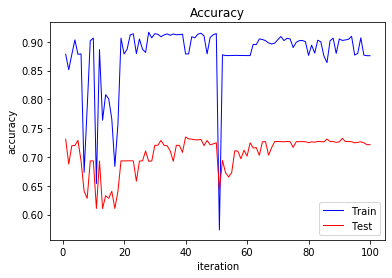

In [78]:
m.fit(X,y)

In [72]:
ans=m.predict(X)

In [73]:
p=[]
for i in range(0,len(ans)):
    p.append([ans[i,0], i])

In [38]:
def ndcg(y_true, y_score, k=5):
        y_true_sorted = sorted(y_true, reverse=True)
        ideal_dcg = 0
        for i in range(k):
            ideal_dcg += (2 ** y_true_sorted[i] - 1.) / np.log2(i + 2)
        dcg = 0
        argsort_indices = np.argsort(y_score)[::-1]
        for i in range(k):
            dcg += (2 ** y_true[argsort_indices[i]] - 1.) / np.log2(i + 2)
        ndcg = dcg / ideal_dcg
        return ndcg

In [ ]:
ndcg(y,)

In [74]:
p.sort()

In [75]:
for i in p:
    print(i)

[0.0, 1]
[0.0, 3]
[0.0, 4]
[0.0, 5]
[0.0, 6]
[0.0, 8]
[0.0, 9]
[0.0, 10]
[0.0, 11]
[0.0, 12]
[0.0, 13]
[0.0, 14]
[0.0, 15]
[0.0, 16]
[0.0, 20]
[0.0, 21]
[0.0, 22]
[0.0, 23]
[0.0, 25]
[0.0, 26]
[0.0, 27]
[0.0, 28]
[0.0, 29]
[0.0, 30]
[0.0, 31]
[0.0, 32]
[0.0, 33]
[0.0, 34]
[0.0, 35]
[0.0, 36]
[0.0, 37]
[0.0, 38]
[0.0, 39]
[0.0, 40]
[0.0, 41]
[0.0, 42]
[0.0, 43]
[0.0, 44]
[0.0, 45]
[0.0, 46]
[0.0, 47]
[0.0, 48]
[0.0, 49]
[0.0, 50]
[0.0, 51]
[0.0, 53]
[0.0, 55]
[0.0, 56]
[0.0, 58]
[0.0, 59]
[0.0, 60]
[0.0, 61]
[0.0, 63]
[0.0, 64]
[0.0, 65]
[0.0, 66]
[0.0, 67]
[0.0, 68]
[0.0, 69]
[0.0, 70]
[0.0, 71]
[0.0, 72]
[0.0, 73]
[0.0, 74]
[0.0, 75]
[0.0, 76]
[0.0, 77]
[0.0, 78]
[0.0, 79]
[0.0, 80]
[0.0, 81]
[0.0, 82]
[0.0, 83]
[0.0, 84]
[0.0, 85]
[0.0, 86]
[0.0, 87]
[0.0, 88]
[0.0, 89]
[0.0, 90]
[0.0, 91]
[0.0, 92]
[0.0, 93]
[0.0, 95]
[0.0, 96]
[0.0, 97]
[0.0, 98]
[0.0, 99]
[0.0, 100]
[0.0, 101]
[0.0, 102]
[0.0, 103]
[0.0, 104]
[0.0, 105]
[0.0, 106]
[0.0, 107]
[0.0, 108]
[0.0, 109]
[0.0, 110]
[0.0, 

[0.0, 1782]
[0.0, 1783]
[0.0, 1784]
[0.0, 1785]
[0.0, 1786]
[0.0, 1787]
[0.0, 1788]
[0.0, 1789]
[0.0, 1790]
[0.0, 1791]
[0.0, 1792]
[0.0, 1793]
[0.0, 1794]
[0.0, 1795]
[0.0, 1796]
[0.0, 1798]
[0.0, 1800]
[0.0, 1801]
[0.0, 1802]
[0.0, 1803]
[0.0, 1804]
[0.0, 1805]
[0.0, 1806]
[0.0, 1807]
[0.0, 1808]
[0.0, 1809]
[0.0, 1810]
[0.0, 1811]
[0.0, 1812]
[0.0, 1813]
[0.0, 1814]
[0.0, 1815]
[0.0, 1816]
[0.0, 1817]
[0.0, 1819]
[0.0, 1820]
[0.0, 1821]
[0.0, 1822]
[0.0, 1823]
[0.0, 1824]
[0.0, 1825]
[0.0, 1826]
[0.0, 1827]
[0.0, 1828]
[0.0, 1829]
[0.0, 1830]
[0.0, 1831]
[0.0, 1832]
[0.0, 1833]
[0.0, 1834]
[0.0, 1835]
[0.0, 1836]
[0.0, 1837]
[0.0, 1838]
[0.0, 1839]
[0.0, 1840]
[0.0, 1841]
[0.0, 1842]
[0.0, 1843]
[0.0, 1844]
[0.0, 1845]
[0.0, 1846]
[0.0, 1847]
[0.0, 1848]
[0.0, 1849]
[0.0, 1850]
[0.0, 1851]
[0.0, 1852]
[0.0, 1853]
[0.0, 1854]
[0.0, 1855]
[0.0, 1856]
[0.0, 1857]
[0.0, 1858]
[0.0, 1859]
[0.0, 1860]
[0.0, 1861]
[0.0, 1862]
[0.0, 1863]
[0.0, 1864]
[0.0, 1865]
[0.0, 1866]
[0.0, 1867]
[0.0

[0.0, 3316]
[0.0, 3317]
[0.0, 3318]
[0.0, 3319]
[0.0, 3320]
[0.0, 3321]
[0.0, 3322]
[0.0, 3323]
[0.0, 3324]
[0.0, 3325]
[0.0, 3326]
[0.0, 3327]
[0.0, 3328]
[0.0, 3329]
[0.0, 3330]
[0.0, 3331]
[0.0, 3332]
[0.0, 3333]
[0.0, 3334]
[0.0, 3335]
[0.0, 3336]
[0.0, 3337]
[0.0, 3338]
[0.0, 3339]
[0.0, 3340]
[0.0, 3341]
[0.0, 3342]
[0.0, 3343]
[0.0, 3344]
[0.0, 3345]
[0.0, 3346]
[0.0, 3347]
[0.0, 3348]
[0.0, 3349]
[0.0, 3350]
[0.0, 3351]
[0.0, 3352]
[0.0, 3353]
[0.0, 3354]
[0.0, 3355]
[0.0, 3356]
[0.0, 3357]
[0.0, 3358]
[0.0, 3359]
[0.0, 3360]
[0.0, 3361]
[0.0, 3362]
[0.0, 3363]
[0.0, 3364]
[0.0, 3365]
[0.0, 3366]
[0.0, 3367]
[0.0, 3368]
[0.0, 3369]
[0.0, 3370]
[0.0, 3371]
[0.0, 3372]
[0.0, 3373]
[0.0, 3374]
[0.0, 3375]
[0.0, 3376]
[0.0, 3377]
[0.0, 3378]
[0.0, 3379]
[0.0, 3380]
[0.0, 3381]
[0.0, 3382]
[0.0, 3383]
[0.0, 3384]
[0.0, 3385]
[0.0, 3386]
[0.0, 3387]
[0.0, 3389]
[0.0, 3390]
[0.0, 3391]
[0.0, 3392]
[0.0, 3393]
[0.0, 3394]
[0.0, 3395]
[0.0, 3396]
[0.0, 3397]
[0.0, 3398]
[0.0, 3399]
[0.0